In [1]:
# Gym stuff
import gym
import gym_anytrading
from stable_baselines3 import PPO

# Stable baselines - rl stuff
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import A2C, PPO

# Processing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('Reliance.csv')

In [3]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits', 'SUPERT_7_1.0', 'SUPERTd_7_1.0', 'SUPERTl_7_1.0',
       'SUPERTs_7_1.0', 'SMA_5', 'WMA_10', 'SMA_14', 'WMA_28', 'SMA_44',
       'PSARl_0.02_0.2', 'PSARs_0.02_0.2', 'PSARaf_0.02_0.2',
       'PSARr_0.02_0.2'],
      dtype='object')

In [5]:
df['Date']

0       1996-01-01 00:00:00+05:30
1       1996-01-02 00:00:00+05:30
2       1996-01-03 00:00:00+05:30
3       1996-01-04 00:00:00+05:30
4       1996-01-05 00:00:00+05:30
                  ...            
6790    2023-01-02 00:00:00+05:30
6791    2023-01-03 00:00:00+05:30
6792    2023-01-04 00:00:00+05:30
6793    2023-01-05 00:00:00+05:30
6794    2023-01-06 00:00:00+05:30
Name: Date, Length: 6795, dtype: object

In [6]:
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,SUPERT_7_1.0,SUPERTd_7_1.0,SUPERTl_7_1.0,SUPERTs_7_1.0,SMA_5,WMA_10,SMA_14,WMA_28,SMA_44,PSARl_0.02_0.2,PSARs_0.02_0.2,PSARaf_0.02_0.2,PSARr_0.02_0.2
Date,,,,,,,,,,,,,,,,,,,,
1996-01-01 00:00:00+05:30,10.439797,10.495815,10.371046,10.477991,48051995,0.0,0.0,0.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02,0
1996-01-02 00:00:00+05:30,10.452527,10.503452,10.320119,10.396508,77875009,0.0,0.0,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.320119,NaN,0.02,1
1996-01-03 00:00:00+05:30,10.567110,11.048360,10.452527,10.475444,96602936,0.0,0.0,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.320119,NaN,0.04,0
1996-01-04 00:00:00+05:30,10.376140,10.409242,10.238640,10.378686,100099436,0.0,0.0,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.04836,0.02,1
1996-01-05 00:00:00+05:30,10.337946,10.337946,10.218270,10.307390,76935930,0.0,0.0,NaN,1,NaN,NaN,10.407204,NaN,NaN,NaN,NaN,NaN,11.04836,0.04,0


In [7]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,SUPERT_7_1.0,SUPERTd_7_1.0,SUPERTl_7_1.0,SUPERTs_7_1.0,SMA_5,WMA_10,SMA_14,WMA_28,SMA_44,PSARl_0.02_0.2,PSARs_0.02_0.2,PSARaf_0.02_0.2,PSARr_0.02_0.2
Date,,,,,,,,,,,,,,,,,,,,
1996-01-01 00:00:00+05:30,10.439797,10.495815,10.371046,10.477991,48051995,0.0,0.0,0.000000,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02,0
1996-01-02 00:00:00+05:30,10.452527,10.503452,10.320119,10.396508,77875009,0.0,0.0,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.320119,NaN,0.02,1
1996-01-03 00:00:00+05:30,10.567110,11.048360,10.452527,10.475444,96602936,0.0,0.0,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.320119,NaN,0.04,0
1996-01-04 00:00:00+05:30,10.376140,10.409242,10.238640,10.378686,100099436,0.0,0.0,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.048360,0.02,1
1996-01-05 00:00:00+05:30,10.337946,10.337946,10.218270,10.307390,76935930,0.0,0.0,NaN,1,NaN,NaN,10.407204,NaN,NaN,NaN,NaN,NaN,11.048360,0.04,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-02 00:00:00+05:30,2550.000000,2579.000000,2548.199951,2575.899902,2453414,0.0,0.0,2522.412696,1,2522.412696,NaN,2551.109961,2550.232702,2566.046439,2587.494342,2603.731834,NaN,2612.262103,0.08,0
2023-01-03 00:00:00+05:30,2565.050049,2573.000000,2547.800049,2557.050049,3534596,0.0,0.0,2522.412696,1,2522.412696,NaN,2553.579980,2550.316349,2561.871443,2583.454689,2604.350014,NaN,2602.661135,0.08,0
2023-01-04 00:00:00+05:30,2557.000000,2561.050049,2514.000000,2518.550049,4275746,0.0,0.0,2577.947301,-1,NaN,2577.947301,2548.400000,2544.577268,2557.600010,2576.814174,2603.734109,NaN,2593.828244,0.08,0


In [8]:
df.rename(columns={'close': 'Close', 'open':'Open', 'low':'Low', 'volume':'Volume'}, inplace=True)

In [9]:
df.shape

(6795, 20)

In [20]:
env = gym.make('stocks-v0', df=df, frame_bound=(5,5000), window_size=5)

In [21]:
env.signal_features.shape


(5000, 2)

In [11]:
df

,Open,high,Low,Close,Volume,SUPERT_7_1.0,SUPERTd_7_1.0,SUPERTl_7_1.0,SUPERTs_7_1.0,SMA_5,WMA_10,SMA_14,WMA_28,SMA_44,PSARl_0.02_0.2,PSARs_0.02_0.2,PSARaf_0.02_0.2,PSARr_0.02_0.2
DateTime,,,,,,,,,,,,,,,,,,
2022-11-04 09:15:00,7121.60,7192.65,7121.60,7191.00,134427,0.000000,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02,0
2022-11-04 09:30:00,7191.00,7221.00,7191.00,7200.00,109590,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6593.000000,NaN,0.04,0
2022-11-04 09:45:00,7196.10,7209.90,7184.05,7196.45,38163,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6618.120000,NaN,0.04,0
2022-11-04 10:00:00,7196.45,7224.90,7195.00,7202.50,42806,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6642.235200,NaN,0.06,0
2022-11-04 10:15:00,7205.00,7205.00,7166.10,7172.00,39409,NaN,1,NaN,NaN,7192.39,NaN,NaN,NaN,NaN,6677.195088,NaN,0.06,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-03 14:15:00,6601.00,6624.45,6601.00,6618.50,23805,6596.664018,1,6596.664018,NaN,6611.04,6606.963636,6608.389286,6607.913793,6578.578409,NaN,6647.098463,0.02,0
2023-01-03 14:30:00,6619.90,6622.90,6615.00,6618.00,10374,6601.991481,1,6601.991481,NaN,6612.50,6609.663636,6607.882143,6609.223399,6580.777273,NaN,6645.627494,0.02,0
2023-01-03 14:45:00,6618.00,6629.70,6611.00,6618.65,27316,6603.142698,1,6603.142698,NaN,6614.20,6612.192727,6607.367857,6610.415271,6583.188636,NaN,6644.185944,0.02,0


In [41]:
env.env.reward_range

(-inf, inf)

info {'total_reward': 106.53106403350853, 'total_profit': 7.171812676972237e-08, 'position': 0}


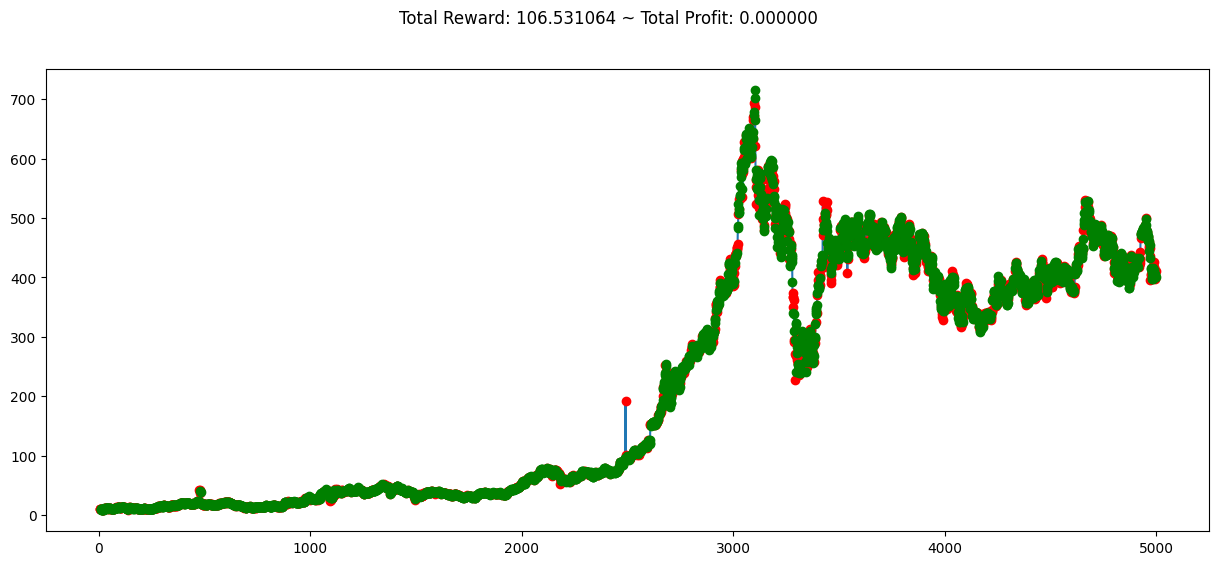

In [38]:
state = env.reset()
while True: 
    action = env.action_space.sample()
    n_state, reward, done, info = env.step(action)
    if done: 
        print("info", info)
        break
        
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

In [51]:
env_maker = lambda: gym.make('stocks-v0', df=df, frame_bound=(10,5000), window_size=10)
env = DummyVecEnv([env_maker])

In [52]:
df['SUPERTd_7_1.0'].value_counts()

 1    3577
-1    3218
Name: SUPERTd_7_1.0, dtype: int64

In [53]:
import pandas_ta as ta

In [54]:
df['RSI'] = df.ta.rsi(14)

In [55]:
df['PSARr_0.02_0.2'].value_counts()

0    6195
1     600
Name: PSARr_0.02_0.2, dtype: int64

In [56]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'SUPERT_7_1.0', 'SUPERTd_7_1.0', 'SUPERTl_7_1.0', 'SUPERTs_7_1.0',
       'SMA_5', 'WMA_10', 'SMA_14', 'WMA_28', 'SMA_44', 'PSARl_0.02_0.2',
       'PSARs_0.02_0.2', 'PSARaf_0.02_0.2', 'PSARr_0.02_0.2', 'RSI'],
      dtype='object')

In [57]:
df.fillna(0)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,SUPERT_7_1.0,SUPERTd_7_1.0,SUPERTl_7_1.0,...,SMA_5,WMA_10,SMA_14,WMA_28,SMA_44,PSARl_0.02_0.2,PSARs_0.02_0.2,PSARaf_0.02_0.2,PSARr_0.02_0.2,RSI
Date,,,,,,,,,,,,,,,,,,,,,
1996-01-01 00:00:00+05:30,10.439797,10.495815,10.371046,10.477991,48051995,0.0,0.0,0.000000,1,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.02,0,0.000000
1996-01-02 00:00:00+05:30,10.452527,10.503452,10.320119,10.396508,77875009,0.0,0.0,0.000000,1,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,10.320119,0.000000,0.02,1,0.000000
1996-01-03 00:00:00+05:30,10.567110,11.048360,10.452527,10.475444,96602936,0.0,0.0,0.000000,1,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,10.320119,0.000000,0.04,0,0.000000
1996-01-04 00:00:00+05:30,10.376140,10.409242,10.238640,10.378686,100099436,0.0,0.0,0.000000,1,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.048360,0.02,1,0.000000
1996-01-05 00:00:00+05:30,10.337946,10.337946,10.218270,10.307390,76935930,0.0,0.0,0.000000,1,0.000000,...,10.407204,0.000000,0.000000,0.000000,0.000000,0.000000,11.048360,0.04,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-02 00:00:00+05:30,2550.000000,2579.000000,2548.199951,2575.899902,2453414,0.0,0.0,2522.412696,1,2522.412696,...,2551.109961,2550.232702,2566.046439,2587.494342,2603.731834,0.000000,2612.262103,0.08,0,48.897033
2023-01-03 00:00:00+05:30,2565.050049,2573.000000,2547.800049,2557.050049,3534596,0.0,0.0,2522.412696,1,2522.412696,...,2553.579980,2550.316349,2561.871443,2583.454689,2604.350014,0.000000,2602.661135,0.08,0,45.753058
2023-01-04 00:00:00+05:30,2557.000000,2561.050049,2514.000000,2518.550049,4275746,0.0,0.0,2577.947301,-1,0.000000,...,2548.400000,2544.577268,2557.600010,2576.814174,2603.734109,0.000000,2593.828244,0.08,0,40.084067


In [58]:
env.df.loc[:, ['Low', 'Volume','SMA_5', 'RSI', 'SUPERTd_7_1.0', 'PSARr_0.02_0.2']].fillna(0).to_numpy()

AttributeError: 'DummyVecEnv' object has no attribute 'df'

In [59]:
def add_signals(env):
    start = env.frame_bound[0] - env.window_size
    end = env.frame_bound[1]
    prices = env.df.loc[:, 'Low'].to_numpy()[start:end]
    signal_features = env.df.loc[:, ['Low', 'Volume','SMA_5', 'RSI', 'SUPERTd_7_1.0', 'PSARr_0.02_0.2']].fillna(0).to_numpy()[start:end]
    return prices, signal_features

In [67]:
from gym_anytrading.envs import StocksEnv

class MyCustomEnv(StocksEnv):
    _process_data = add_signals
    
env2 = MyCustomEnv(df=df, window_size=12, frame_bound=(12,5000))

In [68]:
env2.signal_features

array([[ 1.03710464e+01,  4.80519950e+07,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [ 1.03201192e+01,  7.78750090e+07,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  1.00000000e+00],
       [ 1.04525269e+01,  9.66029360e+07,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       ...,
       [ 3.94652159e+02,  5.36476900e+06,  4.04600623e+02,
         3.75337633e+01, -1.00000000e+00,  0.00000000e+00],
       [ 3.93413934e+02,  7.31637400e+06,  4.01043170e+02,
         3.99135617e+01, -1.00000000e+00,  1.00000000e+00],
       [ 3.99319180e+02,  7.98026400e+06,  4.02414697e+02,
         4.71081063e+01,  1.00000000e+00,  0.00000000e+00]])

In [69]:
import wandb
from wandb.integration.sb3 import WandbCallback

In [70]:
env_maker = lambda: env2
env = DummyVecEnv([env_maker])

In [71]:
config = {
    "policy_type": "MlpPolicy",
    "total_timesteps": 1000000,
    "env_id": "Stocks-v0",
}
run = wandb.init(
    project="sb3-Latest",
    config=config,
    sync_tensorboard=True,  # auto-upload sb3's tensorboard metrics
    monitor_gym=True,  # auto-upload the videos of agents playing the game
    save_code=True,  # optional
)

model_with_signals_A2C = A2C(config["policy_type"], env, verbose=1, tensorboard_log=f"runs/{run.id}")
model_with_signals_A2C.learn(
    total_timesteps=config["total_timesteps"],
    callback=WandbCallback(
        model_save_path=f"models/{run.id}",
        verbose=2,
    ),
)
run.finish()

global_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
time/fps,▃▄▁▃▃▄▆▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇███████████
train/entropy_loss,▁▁▁▁▁▂▃▂▄▅▅▃▅▆▃▆▆▆▅▅▅▆█▇▆█▅▆▇█▆▇▆▇█▇▇▆▇█
train/explained_variance,▅▆▅▄▄▅▅▅▆▆▄▆▅▅▄▅▅▅▆▅▅▅▅▆▆▆▅▆▆▆▆▅▁▆▅▆▆█▆▇
train/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train/policy_loss,▇▁▆▆▅▂▅▅▅▆▅▆▅█▅▅▅▅▅▅▅▅▅▅▅▅▅▇▅▅▅▅▅▅▅▅▅▅▅▅
train/value_loss,▅▇▂▁▁▄▁▁▁▁▁▁▁▃▁▄▁▁▁▁▂▁▁▁▁▂▁▁▁▁▁▁▁▁█▁▁▁▄▁
global_step,115000
time/fps,2907.0
train/entropy_loss,-0.03028
train/explained_variance,0.43294


wandb: WARNING When using several event log directories, please call `wandb.tensorboard.patch(root_logdir="...")` before `wandb.init`


Using cpu device
Logging to runs/l57u9tn8/A2C_1
------------------------------------
| time/                 |          |
|    fps                | 2744     |
|    iterations         | 100      |
|    time_elapsed       | 0        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -0.69    |
|    explained_variance | -0.00782 |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | 0.417    |
|    value_loss         | 0.649    |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2816     |
|    iterations         | 200      |
|    time_elapsed       | 0        |
|    total_timesteps    | 1000     |
| train/                |          |
|    entropy_loss       | -0.689   |
|    explained_variance | 0.023    |
|    learning_rate      | 0.0007   |
|    n_updates          | 199      |
|    policy_loss        | -

------------------------------------
| time/                 |          |
|    fps                | 2895     |
|    iterations         | 1700     |
|    time_elapsed       | 2        |
|    total_timesteps    | 8500     |
| train/                |          |
|    entropy_loss       | -0.68    |
|    explained_variance | -0.0233  |
|    learning_rate      | 0.0007   |
|    n_updates          | 1699     |
|    policy_loss        | 10.7     |
|    value_loss         | 269      |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2902     |
|    iterations         | 1800     |
|    time_elapsed       | 3        |
|    total_timesteps    | 9000     |
| train/                |          |
|    entropy_loss       | -0.59    |
|    explained_variance | 0.00424  |
|    learning_rate      | 0.0007   |
|    n_updates          | 1799     |
|    policy_loss        | -1.55    |
|    value_loss         | 8.74     |
-

-------------------------------------
| time/                 |           |
|    fps                | 2916      |
|    iterations         | 3300      |
|    time_elapsed       | 5         |
|    total_timesteps    | 16500     |
| train/                |           |
|    entropy_loss       | -0.493    |
|    explained_variance | -0.000107 |
|    learning_rate      | 0.0007    |
|    n_updates          | 3299      |
|    policy_loss        | -0.283    |
|    value_loss         | 0.168     |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2918     |
|    iterations         | 3400     |
|    time_elapsed       | 5        |
|    total_timesteps    | 17000    |
| train/                |          |
|    entropy_loss       | -0.413   |
|    explained_variance | -12.5    |
|    learning_rate      | 0.0007   |
|    n_updates          | 3399     |
|    policy_loss        | -0.0224  |
|    value_loss         

------------------------------------
| time/                 |          |
|    fps                | 2918     |
|    iterations         | 4900     |
|    time_elapsed       | 8        |
|    total_timesteps    | 24500    |
| train/                |          |
|    entropy_loss       | -0.637   |
|    explained_variance | -0.0782  |
|    learning_rate      | 0.0007   |
|    n_updates          | 4899     |
|    policy_loss        | -5.8     |
|    value_loss         | 129      |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2921     |
|    iterations         | 5000     |
|    time_elapsed       | 8        |
|    total_timesteps    | 25000    |
| train/                |          |
|    entropy_loss       | -0.657   |
|    explained_variance | -0.585   |
|    learning_rate      | 0.0007   |
|    n_updates          | 4999     |
|    policy_loss        | 0.0546   |
|    value_loss         | 0.0109   |
-

------------------------------------
| time/                 |          |
|    fps                | 2944     |
|    iterations         | 6500     |
|    time_elapsed       | 11       |
|    total_timesteps    | 32500    |
| train/                |          |
|    entropy_loss       | -0.637   |
|    explained_variance | 0.00846  |
|    learning_rate      | 0.0007   |
|    n_updates          | 6499     |
|    policy_loss        | -1.9     |
|    value_loss         | 6.74     |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 2945      |
|    iterations         | 6600      |
|    time_elapsed       | 11        |
|    total_timesteps    | 33000     |
| train/                |           |
|    entropy_loss       | -0.59     |
|    explained_variance | -0.000287 |
|    learning_rate      | 0.0007    |
|    n_updates          | 6599      |
|    policy_loss        | -11.5     |
|    value_loss         | 

------------------------------------
| time/                 |          |
|    fps                | 2945     |
|    iterations         | 8100     |
|    time_elapsed       | 13       |
|    total_timesteps    | 40500    |
| train/                |          |
|    entropy_loss       | -0.393   |
|    explained_variance | -5.61    |
|    learning_rate      | 0.0007   |
|    n_updates          | 8099     |
|    policy_loss        | 0.00243  |
|    value_loss         | 0.00133  |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2947     |
|    iterations         | 8200     |
|    time_elapsed       | 13       |
|    total_timesteps    | 41000    |
| train/                |          |
|    entropy_loss       | -0.507   |
|    explained_variance | -0.0196  |
|    learning_rate      | 0.0007   |
|    n_updates          | 8199     |
|    policy_loss        | 2.57     |
|    value_loss         | 32.4     |
-

-------------------------------------
| time/                 |           |
|    fps                | 2956      |
|    iterations         | 9700      |
|    time_elapsed       | 16        |
|    total_timesteps    | 48500     |
| train/                |           |
|    entropy_loss       | -0.0997   |
|    explained_variance | -0.000638 |
|    learning_rate      | 0.0007    |
|    n_updates          | 9699      |
|    policy_loss        | 0.12      |
|    value_loss         | 136       |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2958     |
|    iterations         | 9800     |
|    time_elapsed       | 16       |
|    total_timesteps    | 49000    |
| train/                |          |
|    entropy_loss       | -0.443   |
|    explained_variance | -0.804   |
|    learning_rate      | 0.0007   |
|    n_updates          | 9799     |
|    policy_loss        | -1.64    |
|    value_loss         

------------------------------------
| time/                 |          |
|    fps                | 2959     |
|    iterations         | 11300    |
|    time_elapsed       | 19       |
|    total_timesteps    | 56500    |
| train/                |          |
|    entropy_loss       | -0.147   |
|    explained_variance | 0.0941   |
|    learning_rate      | 0.0007   |
|    n_updates          | 11299    |
|    policy_loss        | 0.0196   |
|    value_loss         | 0.443    |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2960     |
|    iterations         | 11400    |
|    time_elapsed       | 19       |
|    total_timesteps    | 57000    |
| train/                |          |
|    entropy_loss       | -0.374   |
|    explained_variance | 0.00902  |
|    learning_rate      | 0.0007   |
|    n_updates          | 11399    |
|    policy_loss        | 0.425    |
|    value_loss         | 1.54     |
-

------------------------------------
| time/                 |          |
|    fps                | 2941     |
|    iterations         | 12900    |
|    time_elapsed       | 21       |
|    total_timesteps    | 64500    |
| train/                |          |
|    entropy_loss       | -0.263   |
|    explained_variance | -0.0299  |
|    learning_rate      | 0.0007   |
|    n_updates          | 12899    |
|    policy_loss        | 2.61     |
|    value_loss         | 121      |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 2938      |
|    iterations         | 13000     |
|    time_elapsed       | 22        |
|    total_timesteps    | 65000     |
| train/                |           |
|    entropy_loss       | -0.0408   |
|    explained_variance | -204      |
|    learning_rate      | 0.0007    |
|    n_updates          | 12999     |
|    policy_loss        | -0.000302 |
|    value_loss         | 

------------------------------------
| time/                 |          |
|    fps                | 2941     |
|    iterations         | 14500    |
|    time_elapsed       | 24       |
|    total_timesteps    | 72500    |
| train/                |          |
|    entropy_loss       | -0.313   |
|    explained_variance | 0.00187  |
|    learning_rate      | 0.0007   |
|    n_updates          | 14499    |
|    policy_loss        | 0.129    |
|    value_loss         | 117      |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 2942      |
|    iterations         | 14600     |
|    time_elapsed       | 24        |
|    total_timesteps    | 73000     |
| train/                |           |
|    entropy_loss       | -0.259    |
|    explained_variance | -9.54e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 14599     |
|    policy_loss        | 0.171     |
|    value_loss         | 

------------------------------------
| time/                 |          |
|    fps                | 2888     |
|    iterations         | 16100    |
|    time_elapsed       | 27       |
|    total_timesteps    | 80500    |
| train/                |          |
|    entropy_loss       | -0.485   |
|    explained_variance | 0.00374  |
|    learning_rate      | 0.0007   |
|    n_updates          | 16099    |
|    policy_loss        | 0.0163   |
|    value_loss         | 0.0102   |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2889     |
|    iterations         | 16200    |
|    time_elapsed       | 28       |
|    total_timesteps    | 81000    |
| train/                |          |
|    entropy_loss       | -0.253   |
|    explained_variance | 0.321    |
|    learning_rate      | 0.0007   |
|    n_updates          | 16199    |
|    policy_loss        | -0.125   |
|    value_loss         | 0.0292   |
-

------------------------------------
| time/                 |          |
|    fps                | 2898     |
|    iterations         | 17700    |
|    time_elapsed       | 30       |
|    total_timesteps    | 88500    |
| train/                |          |
|    entropy_loss       | -0.315   |
|    explained_variance | 0.145    |
|    learning_rate      | 0.0007   |
|    n_updates          | 17699    |
|    policy_loss        | 0.0743   |
|    value_loss         | 0.686    |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 2899      |
|    iterations         | 17800     |
|    time_elapsed       | 30        |
|    total_timesteps    | 89000     |
| train/                |           |
|    entropy_loss       | -0.269    |
|    explained_variance | -2.03e-06 |
|    learning_rate      | 0.0007    |
|    n_updates          | 17799     |
|    policy_loss        | 2.66      |
|    value_loss         | 

------------------------------------
| time/                 |          |
|    fps                | 2909     |
|    iterations         | 19300    |
|    time_elapsed       | 33       |
|    total_timesteps    | 96500    |
| train/                |          |
|    entropy_loss       | -0.245   |
|    explained_variance | -0.227   |
|    learning_rate      | 0.0007   |
|    n_updates          | 19299    |
|    policy_loss        | 0.0404   |
|    value_loss         | 0.00873  |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2910     |
|    iterations         | 19400    |
|    time_elapsed       | 33       |
|    total_timesteps    | 97000    |
| train/                |          |
|    entropy_loss       | -0.158   |
|    explained_variance | -1.57    |
|    learning_rate      | 0.0007   |
|    n_updates          | 19399    |
|    policy_loss        | -0.12    |
|    value_loss         | 6.09     |
-

------------------------------------
| time/                 |          |
|    fps                | 2871     |
|    iterations         | 20900    |
|    time_elapsed       | 36       |
|    total_timesteps    | 104500   |
| train/                |          |
|    entropy_loss       | -0.166   |
|    explained_variance | -0.109   |
|    learning_rate      | 0.0007   |
|    n_updates          | 20899    |
|    policy_loss        | -0.0275  |
|    value_loss         | 0.291    |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2868     |
|    iterations         | 21000    |
|    time_elapsed       | 36       |
|    total_timesteps    | 105000   |
| train/                |          |
|    entropy_loss       | -0.133   |
|    explained_variance | -2.86    |
|    learning_rate      | 0.0007   |
|    n_updates          | 20999    |
|    policy_loss        | 0.0335   |
|    value_loss         | 0.745    |
-

------------------------------------
| time/                 |          |
|    fps                | 2847     |
|    iterations         | 22500    |
|    time_elapsed       | 39       |
|    total_timesteps    | 112500   |
| train/                |          |
|    entropy_loss       | -0.29    |
|    explained_variance | -0.182   |
|    learning_rate      | 0.0007   |
|    n_updates          | 22499    |
|    policy_loss        | -0.00468 |
|    value_loss         | 0.000665 |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2846     |
|    iterations         | 22600    |
|    time_elapsed       | 39       |
|    total_timesteps    | 113000   |
| train/                |          |
|    entropy_loss       | -0.142   |
|    explained_variance | -0.0952  |
|    learning_rate      | 0.0007   |
|    n_updates          | 22599    |
|    policy_loss        | -0.0138  |
|    value_loss         | 0.11     |
-

------------------------------------
| time/                 |          |
|    fps                | 2848     |
|    iterations         | 24100    |
|    time_elapsed       | 42       |
|    total_timesteps    | 120500   |
| train/                |          |
|    entropy_loss       | -0.206   |
|    explained_variance | 0.0279   |
|    learning_rate      | 0.0007   |
|    n_updates          | 24099    |
|    policy_loss        | -0.0965  |
|    value_loss         | 0.0868   |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2847     |
|    iterations         | 24200    |
|    time_elapsed       | 42       |
|    total_timesteps    | 121000   |
| train/                |          |
|    entropy_loss       | -0.249   |
|    explained_variance | -0.91    |
|    learning_rate      | 0.0007   |
|    n_updates          | 24199    |
|    policy_loss        | 0.027    |
|    value_loss         | 0.207    |
-

------------------------------------
| time/                 |          |
|    fps                | 2848     |
|    iterations         | 25700    |
|    time_elapsed       | 45       |
|    total_timesteps    | 128500   |
| train/                |          |
|    entropy_loss       | -0.222   |
|    explained_variance | 0.0391   |
|    learning_rate      | 0.0007   |
|    n_updates          | 25699    |
|    policy_loss        | 0.467    |
|    value_loss         | 6.56     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2849     |
|    iterations         | 25800    |
|    time_elapsed       | 45       |
|    total_timesteps    | 129000   |
| train/                |          |
|    entropy_loss       | -0.131   |
|    explained_variance | -0.603   |
|    learning_rate      | 0.0007   |
|    n_updates          | 25799    |
|    policy_loss        | -0.00457 |
|    value_loss         | 0.013    |
-

------------------------------------
| time/                 |          |
|    fps                | 2843     |
|    iterations         | 27300    |
|    time_elapsed       | 48       |
|    total_timesteps    | 136500   |
| train/                |          |
|    entropy_loss       | -0.0564  |
|    explained_variance | 0.304    |
|    learning_rate      | 0.0007   |
|    n_updates          | 27299    |
|    policy_loss        | -0.00749 |
|    value_loss         | 0.000276 |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2842     |
|    iterations         | 27400    |
|    time_elapsed       | 48       |
|    total_timesteps    | 137000   |
| train/                |          |
|    entropy_loss       | -0.283   |
|    explained_variance | 0.0315   |
|    learning_rate      | 0.0007   |
|    n_updates          | 27399    |
|    policy_loss        | -0.352   |
|    value_loss         | 0.717    |
-

-------------------------------------
| time/                 |           |
|    fps                | 2836      |
|    iterations         | 28900     |
|    time_elapsed       | 50        |
|    total_timesteps    | 144500    |
| train/                |           |
|    entropy_loss       | -0.0331   |
|    explained_variance | -2.22     |
|    learning_rate      | 0.0007    |
|    n_updates          | 28899     |
|    policy_loss        | -8.02e-05 |
|    value_loss         | 0.000546  |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2837     |
|    iterations         | 29000    |
|    time_elapsed       | 51       |
|    total_timesteps    | 145000   |
| train/                |          |
|    entropy_loss       | -0.0125  |
|    explained_variance | -2.09    |
|    learning_rate      | 0.0007   |
|    n_updates          | 28999    |
|    policy_loss        | 0.00282  |
|    value_loss         

------------------------------------
| time/                 |          |
|    fps                | 2825     |
|    iterations         | 30500    |
|    time_elapsed       | 53       |
|    total_timesteps    | 152500   |
| train/                |          |
|    entropy_loss       | -0.171   |
|    explained_variance | 0.0332   |
|    learning_rate      | 0.0007   |
|    n_updates          | 30499    |
|    policy_loss        | -0.00149 |
|    value_loss         | 2.77     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2824     |
|    iterations         | 30600    |
|    time_elapsed       | 54       |
|    total_timesteps    | 153000   |
| train/                |          |
|    entropy_loss       | -0.0228  |
|    explained_variance | 0.00805  |
|    learning_rate      | 0.0007   |
|    n_updates          | 30599    |
|    policy_loss        | 0.0176   |
|    value_loss         | 11.2     |
-

------------------------------------
| time/                 |          |
|    fps                | 2821     |
|    iterations         | 32100    |
|    time_elapsed       | 56       |
|    total_timesteps    | 160500   |
| train/                |          |
|    entropy_loss       | -0.185   |
|    explained_variance | -0.226   |
|    learning_rate      | 0.0007   |
|    n_updates          | 32099    |
|    policy_loss        | 0.00726  |
|    value_loss         | 0.0149   |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 2822      |
|    iterations         | 32200     |
|    time_elapsed       | 57        |
|    total_timesteps    | 161000    |
| train/                |           |
|    entropy_loss       | -0.0633   |
|    explained_variance | -0.14     |
|    learning_rate      | 0.0007    |
|    n_updates          | 32199     |
|    policy_loss        | -0.000466 |
|    value_loss         | 

------------------------------------
| time/                 |          |
|    fps                | 2831     |
|    iterations         | 33700    |
|    time_elapsed       | 59       |
|    total_timesteps    | 168500   |
| train/                |          |
|    entropy_loss       | -0.0934  |
|    explained_variance | -2.21    |
|    learning_rate      | 0.0007   |
|    n_updates          | 33699    |
|    policy_loss        | -0.124   |
|    value_loss         | 14.7     |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 2832      |
|    iterations         | 33800     |
|    time_elapsed       | 59        |
|    total_timesteps    | 169000    |
| train/                |           |
|    entropy_loss       | -0.0333   |
|    explained_variance | -0.000894 |
|    learning_rate      | 0.0007    |
|    n_updates          | 33799     |
|    policy_loss        | 0.0159    |
|    value_loss         | 

------------------------------------
| time/                 |          |
|    fps                | 2827     |
|    iterations         | 35300    |
|    time_elapsed       | 62       |
|    total_timesteps    | 176500   |
| train/                |          |
|    entropy_loss       | -0.081   |
|    explained_variance | -3.65    |
|    learning_rate      | 0.0007   |
|    n_updates          | 35299    |
|    policy_loss        | 0.000324 |
|    value_loss         | 0.00131  |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2828     |
|    iterations         | 35400    |
|    time_elapsed       | 62       |
|    total_timesteps    | 177000   |
| train/                |          |
|    entropy_loss       | -0.0936  |
|    explained_variance | -0.133   |
|    learning_rate      | 0.0007   |
|    n_updates          | 35399    |
|    policy_loss        | 0.0173   |
|    value_loss         | 3.19     |
-

------------------------------------
| time/                 |          |
|    fps                | 2823     |
|    iterations         | 36900    |
|    time_elapsed       | 65       |
|    total_timesteps    | 184500   |
| train/                |          |
|    entropy_loss       | -0.442   |
|    explained_variance | 0.00701  |
|    learning_rate      | 0.0007   |
|    n_updates          | 36899    |
|    policy_loss        | -1.29    |
|    value_loss         | 42.7     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2823     |
|    iterations         | 37000    |
|    time_elapsed       | 65       |
|    total_timesteps    | 185000   |
| train/                |          |
|    entropy_loss       | -0.129   |
|    explained_variance | 0.000538 |
|    learning_rate      | 0.0007   |
|    n_updates          | 36999    |
|    policy_loss        | -4.54    |
|    value_loss         | 64       |
-

------------------------------------
| time/                 |          |
|    fps                | 2807     |
|    iterations         | 38500    |
|    time_elapsed       | 68       |
|    total_timesteps    | 192500   |
| train/                |          |
|    entropy_loss       | -0.0776  |
|    explained_variance | 0.00392  |
|    learning_rate      | 0.0007   |
|    n_updates          | 38499    |
|    policy_loss        | -0.228   |
|    value_loss         | 448      |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 2807      |
|    iterations         | 38600     |
|    time_elapsed       | 68        |
|    total_timesteps    | 193000    |
| train/                |           |
|    entropy_loss       | -0.348    |
|    explained_variance | -0.000695 |
|    learning_rate      | 0.0007    |
|    n_updates          | 38599     |
|    policy_loss        | -3.4      |
|    value_loss         | 

------------------------------------
| time/                 |          |
|    fps                | 2800     |
|    iterations         | 40100    |
|    time_elapsed       | 71       |
|    total_timesteps    | 200500   |
| train/                |          |
|    entropy_loss       | -0.0226  |
|    explained_variance | -5.79    |
|    learning_rate      | 0.0007   |
|    n_updates          | 40099    |
|    policy_loss        | 0.00472  |
|    value_loss         | 1.2      |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2800     |
|    iterations         | 40200    |
|    time_elapsed       | 71       |
|    total_timesteps    | 201000   |
| train/                |          |
|    entropy_loss       | -0.064   |
|    explained_variance | -0.133   |
|    learning_rate      | 0.0007   |
|    n_updates          | 40199    |
|    policy_loss        | -0.00303 |
|    value_loss         | 0.444    |
-

-------------------------------------
| time/                 |           |
|    fps                | 2800      |
|    iterations         | 41700     |
|    time_elapsed       | 74        |
|    total_timesteps    | 208500    |
| train/                |           |
|    entropy_loss       | -0.247    |
|    explained_variance | -1.18e+05 |
|    learning_rate      | 0.0007    |
|    n_updates          | 41699     |
|    policy_loss        | -0.413    |
|    value_loss         | 3.54      |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2800     |
|    iterations         | 41800    |
|    time_elapsed       | 74       |
|    total_timesteps    | 209000   |
| train/                |          |
|    entropy_loss       | -0.0937  |
|    explained_variance | -0.46    |
|    learning_rate      | 0.0007   |
|    n_updates          | 41799    |
|    policy_loss        | 0.223    |
|    value_loss         

------------------------------------
| time/                 |          |
|    fps                | 2803     |
|    iterations         | 43300    |
|    time_elapsed       | 77       |
|    total_timesteps    | 216500   |
| train/                |          |
|    entropy_loss       | -0.0405  |
|    explained_variance | -0.0112  |
|    learning_rate      | 0.0007   |
|    n_updates          | 43299    |
|    policy_loss        | 0.0515   |
|    value_loss         | 21.5     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2802     |
|    iterations         | 43400    |
|    time_elapsed       | 77       |
|    total_timesteps    | 217000   |
| train/                |          |
|    entropy_loss       | -0.141   |
|    explained_variance | 0.124    |
|    learning_rate      | 0.0007   |
|    n_updates          | 43399    |
|    policy_loss        | -0.0107  |
|    value_loss         | 0.238    |
-

------------------------------------
| time/                 |          |
|    fps                | 2783     |
|    iterations         | 44900    |
|    time_elapsed       | 80       |
|    total_timesteps    | 224500   |
| train/                |          |
|    entropy_loss       | -0.123   |
|    explained_variance | 0.00624  |
|    learning_rate      | 0.0007   |
|    n_updates          | 44899    |
|    policy_loss        | 0.056    |
|    value_loss         | 0.199    |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2783     |
|    iterations         | 45000    |
|    time_elapsed       | 80       |
|    total_timesteps    | 225000   |
| train/                |          |
|    entropy_loss       | -0.0271  |
|    explained_variance | -0.251   |
|    learning_rate      | 0.0007   |
|    n_updates          | 44999    |
|    policy_loss        | 0.00464  |
|    value_loss         | 0.822    |
-

------------------------------------
| time/                 |          |
|    fps                | 2784     |
|    iterations         | 46500    |
|    time_elapsed       | 83       |
|    total_timesteps    | 232500   |
| train/                |          |
|    entropy_loss       | -0.136   |
|    explained_variance | -0.00165 |
|    learning_rate      | 0.0007   |
|    n_updates          | 46499    |
|    policy_loss        | 1.78     |
|    value_loss         | 308      |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2783     |
|    iterations         | 46600    |
|    time_elapsed       | 83       |
|    total_timesteps    | 233000   |
| train/                |          |
|    entropy_loss       | -0.123   |
|    explained_variance | -20.9    |
|    learning_rate      | 0.0007   |
|    n_updates          | 46599    |
|    policy_loss        | -0.0225  |
|    value_loss         | 0.0429   |
-

------------------------------------
| time/                 |          |
|    fps                | 2790     |
|    iterations         | 48100    |
|    time_elapsed       | 86       |
|    total_timesteps    | 240500   |
| train/                |          |
|    entropy_loss       | -0.0491  |
|    explained_variance | -66.7    |
|    learning_rate      | 0.0007   |
|    n_updates          | 48099    |
|    policy_loss        | 0.00103  |
|    value_loss         | 0.00957  |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 2790      |
|    iterations         | 48200     |
|    time_elapsed       | 86        |
|    total_timesteps    | 241000    |
| train/                |           |
|    entropy_loss       | -0.00151  |
|    explained_variance | 0.126     |
|    learning_rate      | 0.0007    |
|    n_updates          | 48199     |
|    policy_loss        | -2.52e-05 |
|    value_loss         | 

------------------------------------
| time/                 |          |
|    fps                | 2796     |
|    iterations         | 49700    |
|    time_elapsed       | 88       |
|    total_timesteps    | 248500   |
| train/                |          |
|    entropy_loss       | -0.106   |
|    explained_variance | -6.09    |
|    learning_rate      | 0.0007   |
|    n_updates          | 49699    |
|    policy_loss        | -0.105   |
|    value_loss         | 0.0241   |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2797     |
|    iterations         | 49800    |
|    time_elapsed       | 89       |
|    total_timesteps    | 249000   |
| train/                |          |
|    entropy_loss       | -0.153   |
|    explained_variance | 0.128    |
|    learning_rate      | 0.0007   |
|    n_updates          | 49799    |
|    policy_loss        | -0.118   |
|    value_loss         | 5.14     |
-

------------------------------------
| time/                 |          |
|    fps                | 2800     |
|    iterations         | 51300    |
|    time_elapsed       | 91       |
|    total_timesteps    | 256500   |
| train/                |          |
|    entropy_loss       | -0.0305  |
|    explained_variance | -2.38    |
|    learning_rate      | 0.0007   |
|    n_updates          | 51299    |
|    policy_loss        | 0.000468 |
|    value_loss         | 0.0264   |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2799     |
|    iterations         | 51400    |
|    time_elapsed       | 91       |
|    total_timesteps    | 257000   |
| train/                |          |
|    entropy_loss       | -0.177   |
|    explained_variance | 0.00237  |
|    learning_rate      | 0.0007   |
|    n_updates          | 51399    |
|    policy_loss        | 0.189    |
|    value_loss         | 52       |
-

-------------------------------------
| time/                 |           |
|    fps                | 2788      |
|    iterations         | 52900     |
|    time_elapsed       | 94        |
|    total_timesteps    | 264500    |
| train/                |           |
|    entropy_loss       | -0.0367   |
|    explained_variance | 0.497     |
|    learning_rate      | 0.0007    |
|    n_updates          | 52899     |
|    policy_loss        | -0.000199 |
|    value_loss         | 0.0214    |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 2786      |
|    iterations         | 53000     |
|    time_elapsed       | 95        |
|    total_timesteps    | 265000    |
| train/                |           |
|    entropy_loss       | -0.0753   |
|    explained_variance | -5.34e+06 |
|    learning_rate      | 0.0007    |
|    n_updates          | 52999     |
|    policy_loss        | -0.0196   |
|    value_l

------------------------------------
| time/                 |          |
|    fps                | 2783     |
|    iterations         | 54500    |
|    time_elapsed       | 97       |
|    total_timesteps    | 272500   |
| train/                |          |
|    entropy_loss       | -0.0494  |
|    explained_variance | -0.0746  |
|    learning_rate      | 0.0007   |
|    n_updates          | 54499    |
|    policy_loss        | -0.00168 |
|    value_loss         | 6.14     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2783     |
|    iterations         | 54600    |
|    time_elapsed       | 98       |
|    total_timesteps    | 273000   |
| train/                |          |
|    entropy_loss       | -0.139   |
|    explained_variance | 0.121    |
|    learning_rate      | 0.0007   |
|    n_updates          | 54599    |
|    policy_loss        | -0.604   |
|    value_loss         | 20.5     |
-

------------------------------------
| time/                 |          |
|    fps                | 2781     |
|    iterations         | 56100    |
|    time_elapsed       | 100      |
|    total_timesteps    | 280500   |
| train/                |          |
|    entropy_loss       | -0.0167  |
|    explained_variance | 0.0724   |
|    learning_rate      | 0.0007   |
|    n_updates          | 56099    |
|    policy_loss        | 9.71e-05 |
|    value_loss         | 0.238    |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2781     |
|    iterations         | 56200    |
|    time_elapsed       | 101      |
|    total_timesteps    | 281000   |
| train/                |          |
|    entropy_loss       | -0.294   |
|    explained_variance | -0.574   |
|    learning_rate      | 0.0007   |
|    n_updates          | 56199    |
|    policy_loss        | 0.0399   |
|    value_loss         | 0.293    |
-

------------------------------------
| time/                 |          |
|    fps                | 2776     |
|    iterations         | 57700    |
|    time_elapsed       | 103      |
|    total_timesteps    | 288500   |
| train/                |          |
|    entropy_loss       | -0.167   |
|    explained_variance | 0.0674   |
|    learning_rate      | 0.0007   |
|    n_updates          | 57699    |
|    policy_loss        | 0.509    |
|    value_loss         | 1.92     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2777     |
|    iterations         | 57800    |
|    time_elapsed       | 104      |
|    total_timesteps    | 289000   |
| train/                |          |
|    entropy_loss       | -0.0682  |
|    explained_variance | -0.0144  |
|    learning_rate      | 0.0007   |
|    n_updates          | 57799    |
|    policy_loss        | -0.0036  |
|    value_loss         | 52.7     |
-

------------------------------------
| time/                 |          |
|    fps                | 2779     |
|    iterations         | 59300    |
|    time_elapsed       | 106      |
|    total_timesteps    | 296500   |
| train/                |          |
|    entropy_loss       | -0.109   |
|    explained_variance | 0.0837   |
|    learning_rate      | 0.0007   |
|    n_updates          | 59299    |
|    policy_loss        | 0.938    |
|    value_loss         | 2.93     |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 2778      |
|    iterations         | 59400     |
|    time_elapsed       | 106       |
|    total_timesteps    | 297000    |
| train/                |           |
|    entropy_loss       | -0.000188 |
|    explained_variance | 0.0246    |
|    learning_rate      | 0.0007    |
|    n_updates          | 59399     |
|    policy_loss        | 1.27e-06  |
|    value_loss         | 

------------------------------------
| time/                 |          |
|    fps                | 2774     |
|    iterations         | 60900    |
|    time_elapsed       | 109      |
|    total_timesteps    | 304500   |
| train/                |          |
|    entropy_loss       | -0.178   |
|    explained_variance | -0.361   |
|    learning_rate      | 0.0007   |
|    n_updates          | 60899    |
|    policy_loss        | -0.0425  |
|    value_loss         | 0.0343   |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2774     |
|    iterations         | 61000    |
|    time_elapsed       | 109      |
|    total_timesteps    | 305000   |
| train/                |          |
|    entropy_loss       | -0.119   |
|    explained_variance | -0.166   |
|    learning_rate      | 0.0007   |
|    n_updates          | 60999    |
|    policy_loss        | -0.167   |
|    value_loss         | 0.384    |
-

------------------------------------
| time/                 |          |
|    fps                | 2772     |
|    iterations         | 62500    |
|    time_elapsed       | 112      |
|    total_timesteps    | 312500   |
| train/                |          |
|    entropy_loss       | -0.0268  |
|    explained_variance | 0.000959 |
|    learning_rate      | 0.0007   |
|    n_updates          | 62499    |
|    policy_loss        | -0.0216  |
|    value_loss         | 18.8     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2772     |
|    iterations         | 62600    |
|    time_elapsed       | 112      |
|    total_timesteps    | 313000   |
| train/                |          |
|    entropy_loss       | -0.118   |
|    explained_variance | 0.029    |
|    learning_rate      | 0.0007   |
|    n_updates          | 62599    |
|    policy_loss        | 0.389    |
|    value_loss         | 33.3     |
-

------------------------------------
| time/                 |          |
|    fps                | 2771     |
|    iterations         | 64100    |
|    time_elapsed       | 115      |
|    total_timesteps    | 320500   |
| train/                |          |
|    entropy_loss       | -0.00311 |
|    explained_variance | -0.192   |
|    learning_rate      | 0.0007   |
|    n_updates          | 64099    |
|    policy_loss        | 0.000767 |
|    value_loss         | 2.67     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2771     |
|    iterations         | 64200    |
|    time_elapsed       | 115      |
|    total_timesteps    | 321000   |
| train/                |          |
|    entropy_loss       | -0.0401  |
|    explained_variance | 0.00268  |
|    learning_rate      | 0.0007   |
|    n_updates          | 64199    |
|    policy_loss        | -0.00765 |
|    value_loss         | 0.547    |
-

------------------------------------
| time/                 |          |
|    fps                | 2771     |
|    iterations         | 65700    |
|    time_elapsed       | 118      |
|    total_timesteps    | 328500   |
| train/                |          |
|    entropy_loss       | -0.0101  |
|    explained_variance | -5.23    |
|    learning_rate      | 0.0007   |
|    n_updates          | 65699    |
|    policy_loss        | 9.44e-05 |
|    value_loss         | 0.0149   |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2771     |
|    iterations         | 65800    |
|    time_elapsed       | 118      |
|    total_timesteps    | 329000   |
| train/                |          |
|    entropy_loss       | -0.244   |
|    explained_variance | -0.00407 |
|    learning_rate      | 0.0007   |
|    n_updates          | 65799    |
|    policy_loss        | -3.9     |
|    value_loss         | 364      |
-

-------------------------------------
| time/                 |           |
|    fps                | 2768      |
|    iterations         | 67300     |
|    time_elapsed       | 121       |
|    total_timesteps    | 336500    |
| train/                |           |
|    entropy_loss       | -0.0174   |
|    explained_variance | -0.313    |
|    learning_rate      | 0.0007    |
|    n_updates          | 67299     |
|    policy_loss        | -2.08e-05 |
|    value_loss         | 0.0545    |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2768     |
|    iterations         | 67400    |
|    time_elapsed       | 121      |
|    total_timesteps    | 337000   |
| train/                |          |
|    entropy_loss       | -0.0146  |
|    explained_variance | -0.0285  |
|    learning_rate      | 0.0007   |
|    n_updates          | 67399    |
|    policy_loss        | 0.0408   |
|    value_loss         

-------------------------------------
| time/                 |           |
|    fps                | 2769      |
|    iterations         | 68900     |
|    time_elapsed       | 124       |
|    total_timesteps    | 344500    |
| train/                |           |
|    entropy_loss       | -6.83e-06 |
|    explained_variance | -3.63     |
|    learning_rate      | 0.0007    |
|    n_updates          | 68899     |
|    policy_loss        | -6.59e-08 |
|    value_loss         | 0.0106    |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2769     |
|    iterations         | 69000    |
|    time_elapsed       | 124      |
|    total_timesteps    | 345000   |
| train/                |          |
|    entropy_loss       | -0.203   |
|    explained_variance | -0.0969  |
|    learning_rate      | 0.0007   |
|    n_updates          | 68999    |
|    policy_loss        | -0.0969  |
|    value_loss         

------------------------------------
| time/                 |          |
|    fps                | 2772     |
|    iterations         | 70500    |
|    time_elapsed       | 127      |
|    total_timesteps    | 352500   |
| train/                |          |
|    entropy_loss       | -0.00603 |
|    explained_variance | -3.64    |
|    learning_rate      | 0.0007   |
|    n_updates          | 70499    |
|    policy_loss        | 3.17e-05 |
|    value_loss         | 0.00719  |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2773     |
|    iterations         | 70600    |
|    time_elapsed       | 127      |
|    total_timesteps    | 353000   |
| train/                |          |
|    entropy_loss       | -0.0102  |
|    explained_variance | -0.0673  |
|    learning_rate      | 0.0007   |
|    n_updates          | 70599    |
|    policy_loss        | -0.0026  |
|    value_loss         | 1.97     |
-

-------------------------------------
| time/                 |           |
|    fps                | 2773      |
|    iterations         | 72100     |
|    time_elapsed       | 129       |
|    total_timesteps    | 360500    |
| train/                |           |
|    entropy_loss       | -0.0059   |
|    explained_variance | -0.697    |
|    learning_rate      | 0.0007    |
|    n_updates          | 72099     |
|    policy_loss        | -0.000291 |
|    value_loss         | 0.112     |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2773     |
|    iterations         | 72200    |
|    time_elapsed       | 130      |
|    total_timesteps    | 361000   |
| train/                |          |
|    entropy_loss       | -0.0417  |
|    explained_variance | 0.00361  |
|    learning_rate      | 0.0007   |
|    n_updates          | 72199    |
|    policy_loss        | 0.00186  |
|    value_loss         

------------------------------------
| time/                 |          |
|    fps                | 2769     |
|    iterations         | 73700    |
|    time_elapsed       | 133      |
|    total_timesteps    | 368500   |
| train/                |          |
|    entropy_loss       | -0.083   |
|    explained_variance | -0.0644  |
|    learning_rate      | 0.0007   |
|    n_updates          | 73699    |
|    policy_loss        | -0.00714 |
|    value_loss         | 13.6     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2768     |
|    iterations         | 73800    |
|    time_elapsed       | 133      |
|    total_timesteps    | 369000   |
| train/                |          |
|    entropy_loss       | -0.185   |
|    explained_variance | -0.0103  |
|    learning_rate      | 0.0007   |
|    n_updates          | 73799    |
|    policy_loss        | -0.547   |
|    value_loss         | 89.9     |
-

------------------------------------
| time/                 |          |
|    fps                | 2769     |
|    iterations         | 75300    |
|    time_elapsed       | 135      |
|    total_timesteps    | 376500   |
| train/                |          |
|    entropy_loss       | -0.0257  |
|    explained_variance | 0.0903   |
|    learning_rate      | 0.0007   |
|    n_updates          | 75299    |
|    policy_loss        | -0.00324 |
|    value_loss         | 0.196    |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2769     |
|    iterations         | 75400    |
|    time_elapsed       | 136      |
|    total_timesteps    | 377000   |
| train/                |          |
|    entropy_loss       | -0.202   |
|    explained_variance | -0.0299  |
|    learning_rate      | 0.0007   |
|    n_updates          | 75399    |
|    policy_loss        | 0.877    |
|    value_loss         | 93.1     |
-

------------------------------------
| time/                 |          |
|    fps                | 2768     |
|    iterations         | 76900    |
|    time_elapsed       | 138      |
|    total_timesteps    | 384500   |
| train/                |          |
|    entropy_loss       | -0.102   |
|    explained_variance | -0.81    |
|    learning_rate      | 0.0007   |
|    n_updates          | 76899    |
|    policy_loss        | -0.0126  |
|    value_loss         | 0.0208   |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 2768      |
|    iterations         | 77000     |
|    time_elapsed       | 139       |
|    total_timesteps    | 385000    |
| train/                |           |
|    entropy_loss       | -0.000188 |
|    explained_variance | -2.97     |
|    learning_rate      | 0.0007    |
|    n_updates          | 76999     |
|    policy_loss        | -6.5e-08  |
|    value_loss         | 

------------------------------------
| time/                 |          |
|    fps                | 2772     |
|    iterations         | 78500    |
|    time_elapsed       | 141      |
|    total_timesteps    | 392500   |
| train/                |          |
|    entropy_loss       | -0.0853  |
|    explained_variance | 0.249    |
|    learning_rate      | 0.0007   |
|    n_updates          | 78499    |
|    policy_loss        | 0.402    |
|    value_loss         | 97.7     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2772     |
|    iterations         | 78600    |
|    time_elapsed       | 141      |
|    total_timesteps    | 393000   |
| train/                |          |
|    entropy_loss       | -0.00954 |
|    explained_variance | 0.0304   |
|    learning_rate      | 0.0007   |
|    n_updates          | 78599    |
|    policy_loss        | -0.00724 |
|    value_loss         | 18.7     |
-

------------------------------------
| time/                 |          |
|    fps                | 2775     |
|    iterations         | 80100    |
|    time_elapsed       | 144      |
|    total_timesteps    | 400500   |
| train/                |          |
|    entropy_loss       | -0.00242 |
|    explained_variance | -0.0214  |
|    learning_rate      | 0.0007   |
|    n_updates          | 80099    |
|    policy_loss        | 0.000308 |
|    value_loss         | 0.924    |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2776     |
|    iterations         | 80200    |
|    time_elapsed       | 144      |
|    total_timesteps    | 401000   |
| train/                |          |
|    entropy_loss       | -0.12    |
|    explained_variance | -0.0551  |
|    learning_rate      | 0.0007   |
|    n_updates          | 80199    |
|    policy_loss        | 0.012    |
|    value_loss         | 0.163    |
-

------------------------------------
| time/                 |          |
|    fps                | 2779     |
|    iterations         | 81700    |
|    time_elapsed       | 146      |
|    total_timesteps    | 408500   |
| train/                |          |
|    entropy_loss       | -0.0333  |
|    explained_variance | 0.00502  |
|    learning_rate      | 0.0007   |
|    n_updates          | 81699    |
|    policy_loss        | 0.00319  |
|    value_loss         | 5.66     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2779     |
|    iterations         | 81800    |
|    time_elapsed       | 147      |
|    total_timesteps    | 409000   |
| train/                |          |
|    entropy_loss       | -0.102   |
|    explained_variance | -15.3    |
|    learning_rate      | 0.0007   |
|    n_updates          | 81799    |
|    policy_loss        | -0.00789 |
|    value_loss         | 0.0279   |
-

------------------------------------
| time/                 |          |
|    fps                | 2781     |
|    iterations         | 83300    |
|    time_elapsed       | 149      |
|    total_timesteps    | 416500   |
| train/                |          |
|    entropy_loss       | -0.0739  |
|    explained_variance | 0.115    |
|    learning_rate      | 0.0007   |
|    n_updates          | 83299    |
|    policy_loss        | -0.0108  |
|    value_loss         | 0.677    |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2781     |
|    iterations         | 83400    |
|    time_elapsed       | 149      |
|    total_timesteps    | 417000   |
| train/                |          |
|    entropy_loss       | -0.0537  |
|    explained_variance | -0.00325 |
|    learning_rate      | 0.0007   |
|    n_updates          | 83399    |
|    policy_loss        | -0.0124  |
|    value_loss         | 181      |
-

-------------------------------------
| time/                 |           |
|    fps                | 2785      |
|    iterations         | 84900     |
|    time_elapsed       | 152       |
|    total_timesteps    | 424500    |
| train/                |           |
|    entropy_loss       | -0.00429  |
|    explained_variance | 0.196     |
|    learning_rate      | 0.0007    |
|    n_updates          | 84899     |
|    policy_loss        | -0.000103 |
|    value_loss         | 0.0392    |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2785     |
|    iterations         | 85000    |
|    time_elapsed       | 152      |
|    total_timesteps    | 425000   |
| train/                |          |
|    entropy_loss       | -0.0765  |
|    explained_variance | -1.86    |
|    learning_rate      | 0.0007   |
|    n_updates          | 84999    |
|    policy_loss        | -0.00807 |
|    value_loss         

-------------------------------------
| time/                 |           |
|    fps                | 2788      |
|    iterations         | 86500     |
|    time_elapsed       | 155       |
|    total_timesteps    | 432500    |
| train/                |           |
|    entropy_loss       | -2.16e-06 |
|    explained_variance | 0.0264    |
|    learning_rate      | 0.0007    |
|    n_updates          | 86499     |
|    policy_loss        | -2.39e-08 |
|    value_loss         | 14.5      |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 2788      |
|    iterations         | 86600     |
|    time_elapsed       | 155       |
|    total_timesteps    | 433000    |
| train/                |           |
|    entropy_loss       | -0.00404  |
|    explained_variance | -1.7      |
|    learning_rate      | 0.0007    |
|    n_updates          | 86599     |
|    policy_loss        | -6.99e-05 |
|    value_l

------------------------------------
| time/                 |          |
|    fps                | 2791     |
|    iterations         | 88100    |
|    time_elapsed       | 157      |
|    total_timesteps    | 440500   |
| train/                |          |
|    entropy_loss       | -0.0158  |
|    explained_variance | 0.481    |
|    learning_rate      | 0.0007   |
|    n_updates          | 88099    |
|    policy_loss        | -0.00436 |
|    value_loss         | 1.63     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2791     |
|    iterations         | 88200    |
|    time_elapsed       | 157      |
|    total_timesteps    | 441000   |
| train/                |          |
|    entropy_loss       | -0.15    |
|    explained_variance | 0.0635   |
|    learning_rate      | 0.0007   |
|    n_updates          | 88199    |
|    policy_loss        | -0.0353  |
|    value_loss         | 0.0752   |
-

------------------------------------
| time/                 |          |
|    fps                | 2794     |
|    iterations         | 89700    |
|    time_elapsed       | 160      |
|    total_timesteps    | 448500   |
| train/                |          |
|    entropy_loss       | -0.116   |
|    explained_variance | -0.0427  |
|    learning_rate      | 0.0007   |
|    n_updates          | 89699    |
|    policy_loss        | 0.0624   |
|    value_loss         | 98.4     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2795     |
|    iterations         | 89800    |
|    time_elapsed       | 160      |
|    total_timesteps    | 449000   |
| train/                |          |
|    entropy_loss       | -0.00582 |
|    explained_variance | -11.5    |
|    learning_rate      | 0.0007   |
|    n_updates          | 89799    |
|    policy_loss        | -5.9e-05 |
|    value_loss         | 0.0365   |
-

------------------------------------
| time/                 |          |
|    fps                | 2793     |
|    iterations         | 91300    |
|    time_elapsed       | 163      |
|    total_timesteps    | 456500   |
| train/                |          |
|    entropy_loss       | -0.246   |
|    explained_variance | 0.0699   |
|    learning_rate      | 0.0007   |
|    n_updates          | 91299    |
|    policy_loss        | 6.21     |
|    value_loss         | 464      |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2792     |
|    iterations         | 91400    |
|    time_elapsed       | 163      |
|    total_timesteps    | 457000   |
| train/                |          |
|    entropy_loss       | -0.00869 |
|    explained_variance | 0.00295  |
|    learning_rate      | 0.0007   |
|    n_updates          | 91399    |
|    policy_loss        | -0.00766 |
|    value_loss         | 86       |
-

------------------------------------
| time/                 |          |
|    fps                | 2785     |
|    iterations         | 92900    |
|    time_elapsed       | 166      |
|    total_timesteps    | 464500   |
| train/                |          |
|    entropy_loss       | -0.0511  |
|    explained_variance | -1.79    |
|    learning_rate      | 0.0007   |
|    n_updates          | 92899    |
|    policy_loss        | 0.00158  |
|    value_loss         | 0.00563  |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 2785      |
|    iterations         | 93000     |
|    time_elapsed       | 166       |
|    total_timesteps    | 465000    |
| train/                |           |
|    entropy_loss       | -0.00679  |
|    explained_variance | -63.7     |
|    learning_rate      | 0.0007    |
|    n_updates          | 92999     |
|    policy_loss        | -0.000374 |
|    value_loss         | 

------------------------------------
| time/                 |          |
|    fps                | 2784     |
|    iterations         | 94500    |
|    time_elapsed       | 169      |
|    total_timesteps    | 472500   |
| train/                |          |
|    entropy_loss       | -0.152   |
|    explained_variance | 0.627    |
|    learning_rate      | 0.0007   |
|    n_updates          | 94499    |
|    policy_loss        | 0.077    |
|    value_loss         | 0.871    |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2784     |
|    iterations         | 94600    |
|    time_elapsed       | 169      |
|    total_timesteps    | 473000   |
| train/                |          |
|    entropy_loss       | -0.218   |
|    explained_variance | 0.053    |
|    learning_rate      | 0.0007   |
|    n_updates          | 94599    |
|    policy_loss        | 0.028    |
|    value_loss         | 258      |
-

-------------------------------------
| time/                 |           |
|    fps                | 2783      |
|    iterations         | 96100     |
|    time_elapsed       | 172       |
|    total_timesteps    | 480500    |
| train/                |           |
|    entropy_loss       | -0.00209  |
|    explained_variance | 0.298     |
|    learning_rate      | 0.0007    |
|    n_updates          | 96099     |
|    policy_loss        | -8.53e-06 |
|    value_loss         | 0.00289   |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2783     |
|    iterations         | 96200    |
|    time_elapsed       | 172      |
|    total_timesteps    | 481000   |
| train/                |          |
|    entropy_loss       | -0.0966  |
|    explained_variance | -2.34    |
|    learning_rate      | 0.0007   |
|    n_updates          | 96199    |
|    policy_loss        | -0.00936 |
|    value_loss         

------------------------------------
| time/                 |          |
|    fps                | 2775     |
|    iterations         | 97700    |
|    time_elapsed       | 176      |
|    total_timesteps    | 488500   |
| train/                |          |
|    entropy_loss       | -0.133   |
|    explained_variance | -2.72    |
|    learning_rate      | 0.0007   |
|    n_updates          | 97699    |
|    policy_loss        | 0.00856  |
|    value_loss         | 0.016    |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2775     |
|    iterations         | 97800    |
|    time_elapsed       | 176      |
|    total_timesteps    | 489000   |
| train/                |          |
|    entropy_loss       | -0.259   |
|    explained_variance | -0.0987  |
|    learning_rate      | 0.0007   |
|    n_updates          | 97799    |
|    policy_loss        | 0.125    |
|    value_loss         | 0.209    |
-

------------------------------------
| time/                 |          |
|    fps                | 2769     |
|    iterations         | 99300    |
|    time_elapsed       | 179      |
|    total_timesteps    | 496500   |
| train/                |          |
|    entropy_loss       | -0.0971  |
|    explained_variance | -0.0229  |
|    learning_rate      | 0.0007   |
|    n_updates          | 99299    |
|    policy_loss        | 0.0371   |
|    value_loss         | 21.8     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2769     |
|    iterations         | 99400    |
|    time_elapsed       | 179      |
|    total_timesteps    | 497000   |
| train/                |          |
|    entropy_loss       | -0.247   |
|    explained_variance | -0.0113  |
|    learning_rate      | 0.0007   |
|    n_updates          | 99399    |
|    policy_loss        | -4.36    |
|    value_loss         | 592      |
-

------------------------------------
| time/                 |          |
|    fps                | 2763     |
|    iterations         | 100900   |
|    time_elapsed       | 182      |
|    total_timesteps    | 504500   |
| train/                |          |
|    entropy_loss       | -0.00389 |
|    explained_variance | 0.311    |
|    learning_rate      | 0.0007   |
|    n_updates          | 100899   |
|    policy_loss        | 0.000671 |
|    value_loss         | 1.23     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2763     |
|    iterations         | 101000   |
|    time_elapsed       | 182      |
|    total_timesteps    | 505000   |
| train/                |          |
|    entropy_loss       | -0.00871 |
|    explained_variance | 0.362    |
|    learning_rate      | 0.0007   |
|    n_updates          | 100999   |
|    policy_loss        | 0.000689 |
|    value_loss         | 0.68     |
-

------------------------------------
| time/                 |          |
|    fps                | 2763     |
|    iterations         | 102500   |
|    time_elapsed       | 185      |
|    total_timesteps    | 512500   |
| train/                |          |
|    entropy_loss       | -0.00167 |
|    explained_variance | -0.0507  |
|    learning_rate      | 0.0007   |
|    n_updates          | 102499   |
|    policy_loss        | 0.000464 |
|    value_loss         | 5.09     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2763     |
|    iterations         | 102600   |
|    time_elapsed       | 185      |
|    total_timesteps    | 513000   |
| train/                |          |
|    entropy_loss       | -0.00145 |
|    explained_variance | -0.00796 |
|    learning_rate      | 0.0007   |
|    n_updates          | 102599   |
|    policy_loss        | 3.95e-05 |
|    value_loss         | 0.0667   |
-

------------------------------------
| time/                 |          |
|    fps                | 2766     |
|    iterations         | 104100   |
|    time_elapsed       | 188      |
|    total_timesteps    | 520500   |
| train/                |          |
|    entropy_loss       | -0.00969 |
|    explained_variance | -0.824   |
|    learning_rate      | 0.0007   |
|    n_updates          | 104099   |
|    policy_loss        | 0.000737 |
|    value_loss         | 0.1      |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2766     |
|    iterations         | 104200   |
|    time_elapsed       | 188      |
|    total_timesteps    | 521000   |
| train/                |          |
|    entropy_loss       | -0.00754 |
|    explained_variance | 0.0225   |
|    learning_rate      | 0.0007   |
|    n_updates          | 104199   |
|    policy_loss        | 0.00047  |
|    value_loss         | 0.668    |
-

------------------------------------
| time/                 |          |
|    fps                | 2766     |
|    iterations         | 105700   |
|    time_elapsed       | 191      |
|    total_timesteps    | 528500   |
| train/                |          |
|    entropy_loss       | -0.139   |
|    explained_variance | 0.438    |
|    learning_rate      | 0.0007   |
|    n_updates          | 105699   |
|    policy_loss        | -3.14    |
|    value_loss         | 478      |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2767     |
|    iterations         | 105800   |
|    time_elapsed       | 191      |
|    total_timesteps    | 529000   |
| train/                |          |
|    entropy_loss       | -0.0972  |
|    explained_variance | -0.0438  |
|    learning_rate      | 0.0007   |
|    n_updates          | 105799   |
|    policy_loss        | 0.00337  |
|    value_loss         | 1.71     |
-

-------------------------------------
| time/                 |           |
|    fps                | 2770      |
|    iterations         | 107300    |
|    time_elapsed       | 193       |
|    total_timesteps    | 536500    |
| train/                |           |
|    entropy_loss       | -0.0152   |
|    explained_variance | -4.15     |
|    learning_rate      | 0.0007    |
|    n_updates          | 107299    |
|    policy_loss        | -0.000654 |
|    value_loss         | 0.0277    |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2770     |
|    iterations         | 107400   |
|    time_elapsed       | 193      |
|    total_timesteps    | 537000   |
| train/                |          |
|    entropy_loss       | -0.0517  |
|    explained_variance | -3.25    |
|    learning_rate      | 0.0007   |
|    n_updates          | 107399   |
|    policy_loss        | -0.0812  |
|    value_loss         

------------------------------------
| time/                 |          |
|    fps                | 2773     |
|    iterations         | 108900   |
|    time_elapsed       | 196      |
|    total_timesteps    | 544500   |
| train/                |          |
|    entropy_loss       | -0.142   |
|    explained_variance | -0.51    |
|    learning_rate      | 0.0007   |
|    n_updates          | 108899   |
|    policy_loss        | -0.224   |
|    value_loss         | 0.707    |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2774     |
|    iterations         | 109000   |
|    time_elapsed       | 196      |
|    total_timesteps    | 545000   |
| train/                |          |
|    entropy_loss       | -0.026   |
|    explained_variance | -2.03    |
|    learning_rate      | 0.0007   |
|    n_updates          | 108999   |
|    policy_loss        | 1.96e-05 |
|    value_loss         | 0.00803  |
-

------------------------------------
| time/                 |          |
|    fps                | 2776     |
|    iterations         | 110500   |
|    time_elapsed       | 198      |
|    total_timesteps    | 552500   |
| train/                |          |
|    entropy_loss       | -0.00423 |
|    explained_variance | 0.108    |
|    learning_rate      | 0.0007   |
|    n_updates          | 110499   |
|    policy_loss        | -0.00205 |
|    value_loss         | 5.86     |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 2776      |
|    iterations         | 110600    |
|    time_elapsed       | 199       |
|    total_timesteps    | 553000    |
| train/                |           |
|    entropy_loss       | -0.000321 |
|    explained_variance | 0.0252    |
|    learning_rate      | 0.0007    |
|    n_updates          | 110599    |
|    policy_loss        | 0.000402  |
|    value_loss         | 

------------------------------------
| time/                 |          |
|    fps                | 2779     |
|    iterations         | 112100   |
|    time_elapsed       | 201      |
|    total_timesteps    | 560500   |
| train/                |          |
|    entropy_loss       | -0.125   |
|    explained_variance | 0.112    |
|    learning_rate      | 0.0007   |
|    n_updates          | 112099   |
|    policy_loss        | -0.0761  |
|    value_loss         | 0.791    |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2779     |
|    iterations         | 112200   |
|    time_elapsed       | 201      |
|    total_timesteps    | 561000   |
| train/                |          |
|    entropy_loss       | -0.254   |
|    explained_variance | -0.0881  |
|    learning_rate      | 0.0007   |
|    n_updates          | 112199   |
|    policy_loss        | 0.031    |
|    value_loss         | 1.34     |
-

------------------------------------
| time/                 |          |
|    fps                | 2783     |
|    iterations         | 113700   |
|    time_elapsed       | 204      |
|    total_timesteps    | 568500   |
| train/                |          |
|    entropy_loss       | -0.149   |
|    explained_variance | 0.0271   |
|    learning_rate      | 0.0007   |
|    n_updates          | 113699   |
|    policy_loss        | 0.402    |
|    value_loss         | 126      |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 2783      |
|    iterations         | 113800    |
|    time_elapsed       | 204       |
|    total_timesteps    | 569000    |
| train/                |           |
|    entropy_loss       | -4.01e-05 |
|    explained_variance | -43.1     |
|    learning_rate      | 0.0007    |
|    n_updates          | 113799    |
|    policy_loss        | -2.06e-06 |
|    value_loss         | 

------------------------------------
| time/                 |          |
|    fps                | 2786     |
|    iterations         | 115300   |
|    time_elapsed       | 206      |
|    total_timesteps    | 576500   |
| train/                |          |
|    entropy_loss       | -0.138   |
|    explained_variance | 0.0102   |
|    learning_rate      | 0.0007   |
|    n_updates          | 115299   |
|    policy_loss        | -0.0211  |
|    value_loss         | 302      |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2786     |
|    iterations         | 115400   |
|    time_elapsed       | 207      |
|    total_timesteps    | 577000   |
| train/                |          |
|    entropy_loss       | -0.149   |
|    explained_variance | -0.0017  |
|    learning_rate      | 0.0007   |
|    n_updates          | 115399   |
|    policy_loss        | -3.23    |
|    value_loss         | 106      |
-

------------------------------------
| time/                 |          |
|    fps                | 2790     |
|    iterations         | 116900   |
|    time_elapsed       | 209      |
|    total_timesteps    | 584500   |
| train/                |          |
|    entropy_loss       | -0.00379 |
|    explained_variance | 0.509    |
|    learning_rate      | 0.0007   |
|    n_updates          | 116899   |
|    policy_loss        | -7.6e-05 |
|    value_loss         | 0.0247   |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2790     |
|    iterations         | 117000   |
|    time_elapsed       | 209      |
|    total_timesteps    | 585000   |
| train/                |          |
|    entropy_loss       | -0.0568  |
|    explained_variance | -13.2    |
|    learning_rate      | 0.0007   |
|    n_updates          | 116999   |
|    policy_loss        | 0.113    |
|    value_loss         | 0.198    |
-

------------------------------------
| time/                 |          |
|    fps                | 2793     |
|    iterations         | 118500   |
|    time_elapsed       | 212      |
|    total_timesteps    | 592500   |
| train/                |          |
|    entropy_loss       | -0.0635  |
|    explained_variance | -0.0551  |
|    learning_rate      | 0.0007   |
|    n_updates          | 118499   |
|    policy_loss        | 1.37     |
|    value_loss         | 4.37     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2793     |
|    iterations         | 118600   |
|    time_elapsed       | 212      |
|    total_timesteps    | 593000   |
| train/                |          |
|    entropy_loss       | -0.139   |
|    explained_variance | 0.024    |
|    learning_rate      | 0.0007   |
|    n_updates          | 118599   |
|    policy_loss        | 1.81     |
|    value_loss         | 177      |
-

------------------------------------
| time/                 |          |
|    fps                | 2796     |
|    iterations         | 120100   |
|    time_elapsed       | 214      |
|    total_timesteps    | 600500   |
| train/                |          |
|    entropy_loss       | -0.00736 |
|    explained_variance | -0.0588  |
|    learning_rate      | 0.0007   |
|    n_updates          | 120099   |
|    policy_loss        | 0.00038  |
|    value_loss         | 7.28     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2797     |
|    iterations         | 120200   |
|    time_elapsed       | 214      |
|    total_timesteps    | 601000   |
| train/                |          |
|    entropy_loss       | -0.0199  |
|    explained_variance | -4.63    |
|    learning_rate      | 0.0007   |
|    n_updates          | 120199   |
|    policy_loss        | 0.000236 |
|    value_loss         | 0.0272   |
-

------------------------------------
| time/                 |          |
|    fps                | 2799     |
|    iterations         | 121700   |
|    time_elapsed       | 217      |
|    total_timesteps    | 608500   |
| train/                |          |
|    entropy_loss       | -0.258   |
|    explained_variance | 0.126    |
|    learning_rate      | 0.0007   |
|    n_updates          | 121699   |
|    policy_loss        | -0.0155  |
|    value_loss         | 0.0362   |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2800     |
|    iterations         | 121800   |
|    time_elapsed       | 217      |
|    total_timesteps    | 609000   |
| train/                |          |
|    entropy_loss       | -0.0595  |
|    explained_variance | -0.569   |
|    learning_rate      | 0.0007   |
|    n_updates          | 121799   |
|    policy_loss        | 0.0033   |
|    value_loss         | 0.103    |
-

------------------------------------
| time/                 |          |
|    fps                | 2802     |
|    iterations         | 123300   |
|    time_elapsed       | 219      |
|    total_timesteps    | 616500   |
| train/                |          |
|    entropy_loss       | -0.136   |
|    explained_variance | -0.0031  |
|    learning_rate      | 0.0007   |
|    n_updates          | 123299   |
|    policy_loss        | -15.7    |
|    value_loss         | 8.94e+03 |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2803     |
|    iterations         | 123400   |
|    time_elapsed       | 220      |
|    total_timesteps    | 617000   |
| train/                |          |
|    entropy_loss       | -0.186   |
|    explained_variance | -2.23    |
|    learning_rate      | 0.0007   |
|    n_updates          | 123399   |
|    policy_loss        | -2.34    |
|    value_loss         | 322      |
-

------------------------------------
| time/                 |          |
|    fps                | 2805     |
|    iterations         | 124900   |
|    time_elapsed       | 222      |
|    total_timesteps    | 624500   |
| train/                |          |
|    entropy_loss       | -0.165   |
|    explained_variance | -29      |
|    learning_rate      | 0.0007   |
|    n_updates          | 124899   |
|    policy_loss        | -0.0574  |
|    value_loss         | 0.222    |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 2805      |
|    iterations         | 125000    |
|    time_elapsed       | 222       |
|    total_timesteps    | 625000    |
| train/                |           |
|    entropy_loss       | -0.0406   |
|    explained_variance | -1.9      |
|    learning_rate      | 0.0007    |
|    n_updates          | 124999    |
|    policy_loss        | -0.000172 |
|    value_loss         | 

-------------------------------------
| time/                 |           |
|    fps                | 2807      |
|    iterations         | 126500    |
|    time_elapsed       | 225       |
|    total_timesteps    | 632500    |
| train/                |           |
|    entropy_loss       | -0.00143  |
|    explained_variance | 0.0196    |
|    learning_rate      | 0.0007    |
|    n_updates          | 126499    |
|    policy_loss        | -7.13e-05 |
|    value_loss         | 9.84      |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2807     |
|    iterations         | 126600   |
|    time_elapsed       | 225      |
|    total_timesteps    | 633000   |
| train/                |          |
|    entropy_loss       | -0.00425 |
|    explained_variance | 0.181    |
|    learning_rate      | 0.0007   |
|    n_updates          | 126599   |
|    policy_loss        | 0.000259 |
|    value_loss         

------------------------------------
| time/                 |          |
|    fps                | 2809     |
|    iterations         | 128100   |
|    time_elapsed       | 227      |
|    total_timesteps    | 640500   |
| train/                |          |
|    entropy_loss       | -0.00499 |
|    explained_variance | -4.95    |
|    learning_rate      | 0.0007   |
|    n_updates          | 128099   |
|    policy_loss        | -0.00129 |
|    value_loss         | 3.8      |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 2810      |
|    iterations         | 128200    |
|    time_elapsed       | 228       |
|    total_timesteps    | 641000    |
| train/                |           |
|    entropy_loss       | -0.000645 |
|    explained_variance | -0.11     |
|    learning_rate      | 0.0007    |
|    n_updates          | 128199    |
|    policy_loss        | 0.000168  |
|    value_loss         | 

------------------------------------
| time/                 |          |
|    fps                | 2812     |
|    iterations         | 129700   |
|    time_elapsed       | 230      |
|    total_timesteps    | 648500   |
| train/                |          |
|    entropy_loss       | -0.156   |
|    explained_variance | 0.689    |
|    learning_rate      | 0.0007   |
|    n_updates          | 129699   |
|    policy_loss        | 0.0198   |
|    value_loss         | 0.00978  |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2812     |
|    iterations         | 129800   |
|    time_elapsed       | 230      |
|    total_timesteps    | 649000   |
| train/                |          |
|    entropy_loss       | -0.137   |
|    explained_variance | -123     |
|    learning_rate      | 0.0007   |
|    n_updates          | 129799   |
|    policy_loss        | -0.0136  |
|    value_loss         | 0.423    |
-

------------------------------------
| time/                 |          |
|    fps                | 2814     |
|    iterations         | 131300   |
|    time_elapsed       | 233      |
|    total_timesteps    | 656500   |
| train/                |          |
|    entropy_loss       | -0.0459  |
|    explained_variance | 0.000233 |
|    learning_rate      | 0.0007   |
|    n_updates          | 131299   |
|    policy_loss        | -0.498   |
|    value_loss         | 2.11e+03 |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2814     |
|    iterations         | 131400   |
|    time_elapsed       | 233      |
|    total_timesteps    | 657000   |
| train/                |          |
|    entropy_loss       | -0.00394 |
|    explained_variance | 0.261    |
|    learning_rate      | 0.0007   |
|    n_updates          | 131399   |
|    policy_loss        | -0.00158 |
|    value_loss         | 9.92     |
-

-------------------------------------
| time/                 |           |
|    fps                | 2813      |
|    iterations         | 132900    |
|    time_elapsed       | 236       |
|    total_timesteps    | 664500    |
| train/                |           |
|    entropy_loss       | -0.000832 |
|    explained_variance | -3.91     |
|    learning_rate      | 0.0007    |
|    n_updates          | 132899    |
|    policy_loss        | 1.42e-05  |
|    value_loss         | 0.0281    |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2813     |
|    iterations         | 133000   |
|    time_elapsed       | 236      |
|    total_timesteps    | 665000   |
| train/                |          |
|    entropy_loss       | -0.0116  |
|    explained_variance | 0.578    |
|    learning_rate      | 0.0007   |
|    n_updates          | 132999   |
|    policy_loss        | 0.00227  |
|    value_loss         

------------------------------------
| time/                 |          |
|    fps                | 2813     |
|    iterations         | 134500   |
|    time_elapsed       | 238      |
|    total_timesteps    | 672500   |
| train/                |          |
|    entropy_loss       | -0.0294  |
|    explained_variance | 0.723    |
|    learning_rate      | 0.0007   |
|    n_updates          | 134499   |
|    policy_loss        | 0.00259  |
|    value_loss         | 0.231    |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 2813      |
|    iterations         | 134600    |
|    time_elapsed       | 239       |
|    total_timesteps    | 673000    |
| train/                |           |
|    entropy_loss       | -0.000985 |
|    explained_variance | -0.00836  |
|    learning_rate      | 0.0007    |
|    n_updates          | 134599    |
|    policy_loss        | -0.00147  |
|    value_loss         | 

------------------------------------
| time/                 |          |
|    fps                | 2814     |
|    iterations         | 136100   |
|    time_elapsed       | 241      |
|    total_timesteps    | 680500   |
| train/                |          |
|    entropy_loss       | -0.00138 |
|    explained_variance | 0.172    |
|    learning_rate      | 0.0007   |
|    n_updates          | 136099   |
|    policy_loss        | 5.88e-05 |
|    value_loss         | 2.94     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2814     |
|    iterations         | 136200   |
|    time_elapsed       | 241      |
|    total_timesteps    | 681000   |
| train/                |          |
|    entropy_loss       | -0.00048 |
|    explained_variance | -1.6     |
|    learning_rate      | 0.0007   |
|    n_updates          | 136199   |
|    policy_loss        | 1.06e-05 |
|    value_loss         | 0.0204   |
-

------------------------------------
| time/                 |          |
|    fps                | 2813     |
|    iterations         | 137700   |
|    time_elapsed       | 244      |
|    total_timesteps    | 688500   |
| train/                |          |
|    entropy_loss       | -0.028   |
|    explained_variance | 0.383    |
|    learning_rate      | 0.0007   |
|    n_updates          | 137699   |
|    policy_loss        | -0.00278 |
|    value_loss         | 0.0987   |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 2813      |
|    iterations         | 137800    |
|    time_elapsed       | 244       |
|    total_timesteps    | 689000    |
| train/                |           |
|    entropy_loss       | -0.00107  |
|    explained_variance | 0.238     |
|    learning_rate      | 0.0007    |
|    n_updates          | 137799    |
|    policy_loss        | -2.36e-05 |
|    value_loss         | 

------------------------------------
| time/                 |          |
|    fps                | 2814     |
|    iterations         | 139300   |
|    time_elapsed       | 247      |
|    total_timesteps    | 696500   |
| train/                |          |
|    entropy_loss       | -0.00809 |
|    explained_variance | -0.0346  |
|    learning_rate      | 0.0007   |
|    n_updates          | 139299   |
|    policy_loss        | -0.00141 |
|    value_loss         | 112      |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2814     |
|    iterations         | 139400   |
|    time_elapsed       | 247      |
|    total_timesteps    | 697000   |
| train/                |          |
|    entropy_loss       | -0.00094 |
|    explained_variance | 0.0474   |
|    learning_rate      | 0.0007   |
|    n_updates          | 139399   |
|    policy_loss        | 0.000249 |
|    value_loss         | 23.9     |
-

-------------------------------------
| time/                 |           |
|    fps                | 2814      |
|    iterations         | 140900    |
|    time_elapsed       | 250       |
|    total_timesteps    | 704500    |
| train/                |           |
|    entropy_loss       | -0.000171 |
|    explained_variance | 0.221     |
|    learning_rate      | 0.0007    |
|    n_updates          | 140899    |
|    policy_loss        | 4.23e-06  |
|    value_loss         | 0.963     |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2814     |
|    iterations         | 141000   |
|    time_elapsed       | 250      |
|    total_timesteps    | 705000   |
| train/                |          |
|    entropy_loss       | -0.112   |
|    explained_variance | -0.2     |
|    learning_rate      | 0.0007   |
|    n_updates          | 140999   |
|    policy_loss        | 0.0065   |
|    value_loss         

-------------------------------------
| time/                 |           |
|    fps                | 2813      |
|    iterations         | 142500    |
|    time_elapsed       | 253       |
|    total_timesteps    | 712500    |
| train/                |           |
|    entropy_loss       | -0.000329 |
|    explained_variance | -1.52e+03 |
|    learning_rate      | 0.0007    |
|    n_updates          | 142499    |
|    policy_loss        | -0.000175 |
|    value_loss         | 31.7      |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2813     |
|    iterations         | 142600   |
|    time_elapsed       | 253      |
|    total_timesteps    | 713000   |
| train/                |          |
|    entropy_loss       | -0.149   |
|    explained_variance | 0.0739   |
|    learning_rate      | 0.0007   |
|    n_updates          | 142599   |
|    policy_loss        | -3.75    |
|    value_loss         

------------------------------------
| time/                 |          |
|    fps                | 2814     |
|    iterations         | 144100   |
|    time_elapsed       | 255      |
|    total_timesteps    | 720500   |
| train/                |          |
|    entropy_loss       | -0.0209  |
|    explained_variance | -1.08    |
|    learning_rate      | 0.0007   |
|    n_updates          | 144099   |
|    policy_loss        | 0.00111  |
|    value_loss         | 0.0565   |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2814     |
|    iterations         | 144200   |
|    time_elapsed       | 256      |
|    total_timesteps    | 721000   |
| train/                |          |
|    entropy_loss       | -0.0369  |
|    explained_variance | -0.0556  |
|    learning_rate      | 0.0007   |
|    n_updates          | 144199   |
|    policy_loss        | 0.00182  |
|    value_loss         | 93.2     |
-

-------------------------------------
| time/                 |           |
|    fps                | 2815      |
|    iterations         | 145700    |
|    time_elapsed       | 258       |
|    total_timesteps    | 728500    |
| train/                |           |
|    entropy_loss       | -7.71e-06 |
|    explained_variance | -11.5     |
|    learning_rate      | 0.0007    |
|    n_updates          | 145699    |
|    policy_loss        | -3.17e-07 |
|    value_loss         | 0.197     |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2815     |
|    iterations         | 145800   |
|    time_elapsed       | 258      |
|    total_timesteps    | 729000   |
| train/                |          |
|    entropy_loss       | -0.0938  |
|    explained_variance | -3.05    |
|    learning_rate      | 0.0007   |
|    n_updates          | 145799   |
|    policy_loss        | -0.0722  |
|    value_loss         

------------------------------------
| time/                 |          |
|    fps                | 2816     |
|    iterations         | 147300   |
|    time_elapsed       | 261      |
|    total_timesteps    | 736500   |
| train/                |          |
|    entropy_loss       | -0.171   |
|    explained_variance | -0.245   |
|    learning_rate      | 0.0007   |
|    n_updates          | 147299   |
|    policy_loss        | 0.33     |
|    value_loss         | 67.4     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2816     |
|    iterations         | 147400   |
|    time_elapsed       | 261      |
|    total_timesteps    | 737000   |
| train/                |          |
|    entropy_loss       | -0.14    |
|    explained_variance | -0.274   |
|    learning_rate      | 0.0007   |
|    n_updates          | 147399   |
|    policy_loss        | -0.508   |
|    value_loss         | 9.11     |
-

------------------------------------
| time/                 |          |
|    fps                | 2818     |
|    iterations         | 148900   |
|    time_elapsed       | 264      |
|    total_timesteps    | 744500   |
| train/                |          |
|    entropy_loss       | -0.0938  |
|    explained_variance | -4.73    |
|    learning_rate      | 0.0007   |
|    n_updates          | 148899   |
|    policy_loss        | -0.00548 |
|    value_loss         | 0.0144   |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2818     |
|    iterations         | 149000   |
|    time_elapsed       | 264      |
|    total_timesteps    | 745000   |
| train/                |          |
|    entropy_loss       | -0.176   |
|    explained_variance | -14.3    |
|    learning_rate      | 0.0007   |
|    n_updates          | 148999   |
|    policy_loss        | 0.0124   |
|    value_loss         | 0.188    |
-

------------------------------------
| time/                 |          |
|    fps                | 2819     |
|    iterations         | 150500   |
|    time_elapsed       | 266      |
|    total_timesteps    | 752500   |
| train/                |          |
|    entropy_loss       | -0.0221  |
|    explained_variance | -0.184   |
|    learning_rate      | 0.0007   |
|    n_updates          | 150499   |
|    policy_loss        | -0.0027  |
|    value_loss         | 10.9     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2819     |
|    iterations         | 150600   |
|    time_elapsed       | 267      |
|    total_timesteps    | 753000   |
| train/                |          |
|    entropy_loss       | -0.0179  |
|    explained_variance | -7.21    |
|    learning_rate      | 0.0007   |
|    n_updates          | 150599   |
|    policy_loss        | 0.000648 |
|    value_loss         | 0.0532   |
-

------------------------------------
| time/                 |          |
|    fps                | 2820     |
|    iterations         | 152100   |
|    time_elapsed       | 269      |
|    total_timesteps    | 760500   |
| train/                |          |
|    entropy_loss       | -0.185   |
|    explained_variance | -1.68    |
|    learning_rate      | 0.0007   |
|    n_updates          | 152099   |
|    policy_loss        | 0.806    |
|    value_loss         | 9.33     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2820     |
|    iterations         | 152200   |
|    time_elapsed       | 269      |
|    total_timesteps    | 761000   |
| train/                |          |
|    entropy_loss       | -0.0392  |
|    explained_variance | 0.000662 |
|    learning_rate      | 0.0007   |
|    n_updates          | 152199   |
|    policy_loss        | 0.241    |
|    value_loss         | 601      |
-

-------------------------------------
| time/                 |           |
|    fps                | 2815      |
|    iterations         | 153700    |
|    time_elapsed       | 272       |
|    total_timesteps    | 768500    |
| train/                |           |
|    entropy_loss       | -0.00354  |
|    explained_variance | 0.27      |
|    learning_rate      | 0.0007    |
|    n_updates          | 153699    |
|    policy_loss        | -0.000517 |
|    value_loss         | 0.572     |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 2815      |
|    iterations         | 153800    |
|    time_elapsed       | 273       |
|    total_timesteps    | 769000    |
| train/                |           |
|    entropy_loss       | -0.000113 |
|    explained_variance | -24.7     |
|    learning_rate      | 0.0007    |
|    n_updates          | 153799    |
|    policy_loss        | 4.73e-06  |
|    value_l

------------------------------------
| time/                 |          |
|    fps                | 2816     |
|    iterations         | 155300   |
|    time_elapsed       | 275      |
|    total_timesteps    | 776500   |
| train/                |          |
|    entropy_loss       | -0.141   |
|    explained_variance | 0.548    |
|    learning_rate      | 0.0007   |
|    n_updates          | 155299   |
|    policy_loss        | -0.0431  |
|    value_loss         | 43.6     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2816     |
|    iterations         | 155400   |
|    time_elapsed       | 275      |
|    total_timesteps    | 777000   |
| train/                |          |
|    entropy_loss       | -0.108   |
|    explained_variance | -0.0114  |
|    learning_rate      | 0.0007   |
|    n_updates          | 155399   |
|    policy_loss        | -0.673   |
|    value_loss         | 122      |
-

------------------------------------
| time/                 |          |
|    fps                | 2818     |
|    iterations         | 156900   |
|    time_elapsed       | 278      |
|    total_timesteps    | 784500   |
| train/                |          |
|    entropy_loss       | -0.0969  |
|    explained_variance | -0.373   |
|    learning_rate      | 0.0007   |
|    n_updates          | 156899   |
|    policy_loss        | -0.106   |
|    value_loss         | 0.0672   |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2818     |
|    iterations         | 157000   |
|    time_elapsed       | 278      |
|    total_timesteps    | 785000   |
| train/                |          |
|    entropy_loss       | -0.198   |
|    explained_variance | -1.24    |
|    learning_rate      | 0.0007   |
|    n_updates          | 156999   |
|    policy_loss        | -0.0242  |
|    value_loss         | 0.0281   |
-

------------------------------------
| time/                 |          |
|    fps                | 2820     |
|    iterations         | 158500   |
|    time_elapsed       | 281      |
|    total_timesteps    | 792500   |
| train/                |          |
|    entropy_loss       | -0.13    |
|    explained_variance | 0.0738   |
|    learning_rate      | 0.0007   |
|    n_updates          | 158499   |
|    policy_loss        | -2.92    |
|    value_loss         | 155      |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2820     |
|    iterations         | 158600   |
|    time_elapsed       | 281      |
|    total_timesteps    | 793000   |
| train/                |          |
|    entropy_loss       | -0.00463 |
|    explained_variance | -5.45    |
|    learning_rate      | 0.0007   |
|    n_updates          | 158599   |
|    policy_loss        | 5.44e-05 |
|    value_loss         | 0.143    |
-

------------------------------------
| time/                 |          |
|    fps                | 2821     |
|    iterations         | 160100   |
|    time_elapsed       | 283      |
|    total_timesteps    | 800500   |
| train/                |          |
|    entropy_loss       | -0.0626  |
|    explained_variance | 0.344    |
|    learning_rate      | 0.0007   |
|    n_updates          | 160099   |
|    policy_loss        | 0.0234   |
|    value_loss         | 3.06     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2821     |
|    iterations         | 160200   |
|    time_elapsed       | 283      |
|    total_timesteps    | 801000   |
| train/                |          |
|    entropy_loss       | -0.0226  |
|    explained_variance | 0.00535  |
|    learning_rate      | 0.0007   |
|    n_updates          | 160199   |
|    policy_loss        | -0.00167 |
|    value_loss         | 90.9     |
-

------------------------------------
| time/                 |          |
|    fps                | 2823     |
|    iterations         | 161700   |
|    time_elapsed       | 286      |
|    total_timesteps    | 808500   |
| train/                |          |
|    entropy_loss       | -0.0143  |
|    explained_variance | -4.22    |
|    learning_rate      | 0.0007   |
|    n_updates          | 161699   |
|    policy_loss        | -0.00151 |
|    value_loss         | 0.446    |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2823     |
|    iterations         | 161800   |
|    time_elapsed       | 286      |
|    total_timesteps    | 809000   |
| train/                |          |
|    entropy_loss       | -0.126   |
|    explained_variance | 0.15     |
|    learning_rate      | 0.0007   |
|    n_updates          | 161799   |
|    policy_loss        | 0.165    |
|    value_loss         | 5.83     |
-

------------------------------------
| time/                 |          |
|    fps                | 2825     |
|    iterations         | 163300   |
|    time_elapsed       | 288      |
|    total_timesteps    | 816500   |
| train/                |          |
|    entropy_loss       | -0.0035  |
|    explained_variance | -4.38    |
|    learning_rate      | 0.0007   |
|    n_updates          | 163299   |
|    policy_loss        | 0.000984 |
|    value_loss         | 3.9      |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2825     |
|    iterations         | 163400   |
|    time_elapsed       | 289      |
|    total_timesteps    | 817000   |
| train/                |          |
|    entropy_loss       | -0.0892  |
|    explained_variance | -2.29    |
|    learning_rate      | 0.0007   |
|    n_updates          | 163399   |
|    policy_loss        | -0.0147  |
|    value_loss         | 0.384    |
-

-------------------------------------
| time/                 |           |
|    fps                | 2827      |
|    iterations         | 164900    |
|    time_elapsed       | 291       |
|    total_timesteps    | 824500    |
| train/                |           |
|    entropy_loss       | -0.0011   |
|    explained_variance | 0.504     |
|    learning_rate      | 0.0007    |
|    n_updates          | 164899    |
|    policy_loss        | -2.99e-05 |
|    value_loss         | 1.48      |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2827     |
|    iterations         | 165000   |
|    time_elapsed       | 291      |
|    total_timesteps    | 825000   |
| train/                |          |
|    entropy_loss       | -0.147   |
|    explained_variance | -3.87    |
|    learning_rate      | 0.0007   |
|    n_updates          | 164999   |
|    policy_loss        | -0.00276 |
|    value_loss         

------------------------------------
| time/                 |          |
|    fps                | 2829     |
|    iterations         | 166500   |
|    time_elapsed       | 294      |
|    total_timesteps    | 832500   |
| train/                |          |
|    entropy_loss       | -0.00423 |
|    explained_variance | -0.13    |
|    learning_rate      | 0.0007   |
|    n_updates          | 166499   |
|    policy_loss        | 0.00218  |
|    value_loss         | 66.9     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2829     |
|    iterations         | 166600   |
|    time_elapsed       | 294      |
|    total_timesteps    | 833000   |
| train/                |          |
|    entropy_loss       | -0.0959  |
|    explained_variance | 0.228    |
|    learning_rate      | 0.0007   |
|    n_updates          | 166599   |
|    policy_loss        | 0.0217   |
|    value_loss         | 0.277    |
-

------------------------------------
| time/                 |          |
|    fps                | 2831     |
|    iterations         | 168100   |
|    time_elapsed       | 296      |
|    total_timesteps    | 840500   |
| train/                |          |
|    entropy_loss       | -0.325   |
|    explained_variance | -3.13    |
|    learning_rate      | 0.0007   |
|    n_updates          | 168099   |
|    policy_loss        | 0.9      |
|    value_loss         | 28.3     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2831     |
|    iterations         | 168200   |
|    time_elapsed       | 297      |
|    total_timesteps    | 841000   |
| train/                |          |
|    entropy_loss       | -0.00662 |
|    explained_variance | 0.0223   |
|    learning_rate      | 0.0007   |
|    n_updates          | 168199   |
|    policy_loss        | -0.00113 |
|    value_loss         | 60.6     |
-

------------------------------------
| time/                 |          |
|    fps                | 2833     |
|    iterations         | 169700   |
|    time_elapsed       | 299      |
|    total_timesteps    | 848500   |
| train/                |          |
|    entropy_loss       | -0.178   |
|    explained_variance | -3.13    |
|    learning_rate      | 0.0007   |
|    n_updates          | 169699   |
|    policy_loss        | -0.0624  |
|    value_loss         | 0.0713   |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2833     |
|    iterations         | 169800   |
|    time_elapsed       | 299      |
|    total_timesteps    | 849000   |
| train/                |          |
|    entropy_loss       | -0.105   |
|    explained_variance | -4.34    |
|    learning_rate      | 0.0007   |
|    n_updates          | 169799   |
|    policy_loss        | 0.144    |
|    value_loss         | 0.0327   |
-

------------------------------------
| time/                 |          |
|    fps                | 2834     |
|    iterations         | 171300   |
|    time_elapsed       | 302      |
|    total_timesteps    | 856500   |
| train/                |          |
|    entropy_loss       | -0.113   |
|    explained_variance | 0.652    |
|    learning_rate      | 0.0007   |
|    n_updates          | 171299   |
|    policy_loss        | -0.00916 |
|    value_loss         | 0.691    |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2834     |
|    iterations         | 171400   |
|    time_elapsed       | 302      |
|    total_timesteps    | 857000   |
| train/                |          |
|    entropy_loss       | -0.25    |
|    explained_variance | 0.141    |
|    learning_rate      | 0.0007   |
|    n_updates          | 171399   |
|    policy_loss        | -0.392   |
|    value_loss         | 145      |
-

-------------------------------------
| time/                 |           |
|    fps                | 2836      |
|    iterations         | 172900    |
|    time_elapsed       | 304       |
|    total_timesteps    | 864500    |
| train/                |           |
|    entropy_loss       | -0.0117   |
|    explained_variance | -9.29     |
|    learning_rate      | 0.0007    |
|    n_updates          | 172899    |
|    policy_loss        | -0.000697 |
|    value_loss         | 0.0407    |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2836     |
|    iterations         | 173000   |
|    time_elapsed       | 304      |
|    total_timesteps    | 865000   |
| train/                |          |
|    entropy_loss       | -0.045   |
|    explained_variance | 0.0238   |
|    learning_rate      | 0.0007   |
|    n_updates          | 172999   |
|    policy_loss        | -0.0283  |
|    value_loss         

------------------------------------
| time/                 |          |
|    fps                | 2837     |
|    iterations         | 174500   |
|    time_elapsed       | 307      |
|    total_timesteps    | 872500   |
| train/                |          |
|    entropy_loss       | -0.173   |
|    explained_variance | 0.0234   |
|    learning_rate      | 0.0007   |
|    n_updates          | 174499   |
|    policy_loss        | -1.14    |
|    value_loss         | 151      |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2838     |
|    iterations         | 174600   |
|    time_elapsed       | 307      |
|    total_timesteps    | 873000   |
| train/                |          |
|    entropy_loss       | -0.193   |
|    explained_variance | -0.147   |
|    learning_rate      | 0.0007   |
|    n_updates          | 174599   |
|    policy_loss        | 0.221    |
|    value_loss         | 0.224    |
-

------------------------------------
| time/                 |          |
|    fps                | 2839     |
|    iterations         | 176100   |
|    time_elapsed       | 310      |
|    total_timesteps    | 880500   |
| train/                |          |
|    entropy_loss       | -0.249   |
|    explained_variance | 0.0685   |
|    learning_rate      | 0.0007   |
|    n_updates          | 176099   |
|    policy_loss        | 1.93     |
|    value_loss         | 53.6     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2839     |
|    iterations         | 176200   |
|    time_elapsed       | 310      |
|    total_timesteps    | 881000   |
| train/                |          |
|    entropy_loss       | -0.00347 |
|    explained_variance | -0.0251  |
|    learning_rate      | 0.0007   |
|    n_updates          | 176199   |
|    policy_loss        | -0.0177  |
|    value_loss         | 935      |
-

-------------------------------------
| time/                 |           |
|    fps                | 2841      |
|    iterations         | 177700    |
|    time_elapsed       | 312       |
|    total_timesteps    | 888500    |
| train/                |           |
|    entropy_loss       | -0.00272  |
|    explained_variance | -0.097    |
|    learning_rate      | 0.0007    |
|    n_updates          | 177699    |
|    policy_loss        | -3.72e-05 |
|    value_loss         | 0.0297    |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2841     |
|    iterations         | 177800   |
|    time_elapsed       | 312      |
|    total_timesteps    | 889000   |
| train/                |          |
|    entropy_loss       | -0.0321  |
|    explained_variance | 0.882    |
|    learning_rate      | 0.0007   |
|    n_updates          | 177799   |
|    policy_loss        | 0.00088  |
|    value_loss         

------------------------------------
| time/                 |          |
|    fps                | 2843     |
|    iterations         | 179300   |
|    time_elapsed       | 315      |
|    total_timesteps    | 896500   |
| train/                |          |
|    entropy_loss       | -0.116   |
|    explained_variance | -0.119   |
|    learning_rate      | 0.0007   |
|    n_updates          | 179299   |
|    policy_loss        | 0.0319   |
|    value_loss         | 4.48     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2843     |
|    iterations         | 179400   |
|    time_elapsed       | 315      |
|    total_timesteps    | 897000   |
| train/                |          |
|    entropy_loss       | -0.076   |
|    explained_variance | 0.108    |
|    learning_rate      | 0.0007   |
|    n_updates          | 179399   |
|    policy_loss        | -0.0015  |
|    value_loss         | 0.0353   |
-

-------------------------------------
| time/                 |           |
|    fps                | 2845      |
|    iterations         | 180900    |
|    time_elapsed       | 317       |
|    total_timesteps    | 904500    |
| train/                |           |
|    entropy_loss       | -0.0246   |
|    explained_variance | 0.872     |
|    learning_rate      | 0.0007    |
|    n_updates          | 180899    |
|    policy_loss        | -0.000429 |
|    value_loss         | 0.0301    |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2845     |
|    iterations         | 181000   |
|    time_elapsed       | 318      |
|    total_timesteps    | 905000   |
| train/                |          |
|    entropy_loss       | -0.222   |
|    explained_variance | -0.0855  |
|    learning_rate      | 0.0007   |
|    n_updates          | 180999   |
|    policy_loss        | -0.399   |
|    value_loss         

------------------------------------
| time/                 |          |
|    fps                | 2847     |
|    iterations         | 182500   |
|    time_elapsed       | 320      |
|    total_timesteps    | 912500   |
| train/                |          |
|    entropy_loss       | -0.176   |
|    explained_variance | -0.00638 |
|    learning_rate      | 0.0007   |
|    n_updates          | 182499   |
|    policy_loss        | -2.06    |
|    value_loss         | 389      |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2847     |
|    iterations         | 182600   |
|    time_elapsed       | 320      |
|    total_timesteps    | 913000   |
| train/                |          |
|    entropy_loss       | -0.107   |
|    explained_variance | -0.265   |
|    learning_rate      | 0.0007   |
|    n_updates          | 182599   |
|    policy_loss        | 0.0381   |
|    value_loss         | 1.35     |
-

------------------------------------
| time/                 |          |
|    fps                | 2848     |
|    iterations         | 184100   |
|    time_elapsed       | 323      |
|    total_timesteps    | 920500   |
| train/                |          |
|    entropy_loss       | -0.0214  |
|    explained_variance | 0.0564   |
|    learning_rate      | 0.0007   |
|    n_updates          | 184099   |
|    policy_loss        | 0.00221  |
|    value_loss         | 3.96     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2849     |
|    iterations         | 184200   |
|    time_elapsed       | 323      |
|    total_timesteps    | 921000   |
| train/                |          |
|    entropy_loss       | -0.195   |
|    explained_variance | 0.0482   |
|    learning_rate      | 0.0007   |
|    n_updates          | 184199   |
|    policy_loss        | 0.101    |
|    value_loss         | 4.06     |
-

-------------------------------------
| time/                 |           |
|    fps                | 2850      |
|    iterations         | 185700    |
|    time_elapsed       | 325       |
|    total_timesteps    | 928500    |
| train/                |           |
|    entropy_loss       | -0.0588   |
|    explained_variance | -0.000271 |
|    learning_rate      | 0.0007    |
|    n_updates          | 185699    |
|    policy_loss        | -0.0188   |
|    value_loss         | 1.38      |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2850     |
|    iterations         | 185800   |
|    time_elapsed       | 325      |
|    total_timesteps    | 929000   |
| train/                |          |
|    entropy_loss       | -0.00164 |
|    explained_variance | -7.23    |
|    learning_rate      | 0.0007   |
|    n_updates          | 185799   |
|    policy_loss        | -0.00011 |
|    value_loss         

------------------------------------
| time/                 |          |
|    fps                | 2851     |
|    iterations         | 187300   |
|    time_elapsed       | 328      |
|    total_timesteps    | 936500   |
| train/                |          |
|    entropy_loss       | -0.0292  |
|    explained_variance | 0.44     |
|    learning_rate      | 0.0007   |
|    n_updates          | 187299   |
|    policy_loss        | 0.00421  |
|    value_loss         | 4.88     |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 2852      |
|    iterations         | 187400    |
|    time_elapsed       | 328       |
|    total_timesteps    | 937000    |
| train/                |           |
|    entropy_loss       | -0.00572  |
|    explained_variance | 0.0702    |
|    learning_rate      | 0.0007    |
|    n_updates          | 187399    |
|    policy_loss        | -0.000764 |
|    value_loss         | 

------------------------------------
| time/                 |          |
|    fps                | 2853     |
|    iterations         | 188900   |
|    time_elapsed       | 331      |
|    total_timesteps    | 944500   |
| train/                |          |
|    entropy_loss       | -0.0211  |
|    explained_variance | -3.18    |
|    learning_rate      | 0.0007   |
|    n_updates          | 188899   |
|    policy_loss        | 0.00143  |
|    value_loss         | 0.231    |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2853     |
|    iterations         | 189000   |
|    time_elapsed       | 331      |
|    total_timesteps    | 945000   |
| train/                |          |
|    entropy_loss       | -0.199   |
|    explained_variance | -0.0697  |
|    learning_rate      | 0.0007   |
|    n_updates          | 188999   |
|    policy_loss        | 0.561    |
|    value_loss         | 3.7      |
-

------------------------------------
| time/                 |          |
|    fps                | 2854     |
|    iterations         | 190500   |
|    time_elapsed       | 333      |
|    total_timesteps    | 952500   |
| train/                |          |
|    entropy_loss       | -0.155   |
|    explained_variance | 0.025    |
|    learning_rate      | 0.0007   |
|    n_updates          | 190499   |
|    policy_loss        | -4.11    |
|    value_loss         | 1.73e+03 |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 2854      |
|    iterations         | 190600    |
|    time_elapsed       | 333       |
|    total_timesteps    | 953000    |
| train/                |           |
|    entropy_loss       | -6.77e-06 |
|    explained_variance | -64.6     |
|    learning_rate      | 0.0007    |
|    n_updates          | 190599    |
|    policy_loss        | -4.89e-07 |
|    value_loss         | 

------------------------------------
| time/                 |          |
|    fps                | 2855     |
|    iterations         | 192100   |
|    time_elapsed       | 336      |
|    total_timesteps    | 960500   |
| train/                |          |
|    entropy_loss       | -0.0547  |
|    explained_variance | 0.0334   |
|    learning_rate      | 0.0007   |
|    n_updates          | 192099   |
|    policy_loss        | -0.00588 |
|    value_loss         | 154      |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 2856      |
|    iterations         | 192200    |
|    time_elapsed       | 336       |
|    total_timesteps    | 961000    |
| train/                |           |
|    entropy_loss       | -0.00794  |
|    explained_variance | -2.39     |
|    learning_rate      | 0.0007    |
|    n_updates          | 192199    |
|    policy_loss        | -0.000439 |
|    value_loss         | 

------------------------------------
| time/                 |          |
|    fps                | 2856     |
|    iterations         | 193700   |
|    time_elapsed       | 339      |
|    total_timesteps    | 968500   |
| train/                |          |
|    entropy_loss       | -0.19    |
|    explained_variance | -0.275   |
|    learning_rate      | 0.0007   |
|    n_updates          | 193699   |
|    policy_loss        | 0.0572   |
|    value_loss         | 0.385    |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2857     |
|    iterations         | 193800   |
|    time_elapsed       | 339      |
|    total_timesteps    | 969000   |
| train/                |          |
|    entropy_loss       | -0.0193  |
|    explained_variance | -39.9    |
|    learning_rate      | 0.0007   |
|    n_updates          | 193799   |
|    policy_loss        | 0.00228  |
|    value_loss         | 0.34     |
-

------------------------------------
| time/                 |          |
|    fps                | 2858     |
|    iterations         | 195300   |
|    time_elapsed       | 341      |
|    total_timesteps    | 976500   |
| train/                |          |
|    entropy_loss       | -0.0369  |
|    explained_variance | -0.526   |
|    learning_rate      | 0.0007   |
|    n_updates          | 195299   |
|    policy_loss        | 0.00665  |
|    value_loss         | 0.27     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2858     |
|    iterations         | 195400   |
|    time_elapsed       | 341      |
|    total_timesteps    | 977000   |
| train/                |          |
|    entropy_loss       | -0.131   |
|    explained_variance | -0.00541 |
|    learning_rate      | 0.0007   |
|    n_updates          | 195399   |
|    policy_loss        | -0.264   |
|    value_loss         | 83.5     |
-

------------------------------------
| time/                 |          |
|    fps                | 2859     |
|    iterations         | 196900   |
|    time_elapsed       | 344      |
|    total_timesteps    | 984500   |
| train/                |          |
|    entropy_loss       | -0.124   |
|    explained_variance | 0.233    |
|    learning_rate      | 0.0007   |
|    n_updates          | 196899   |
|    policy_loss        | 1.09     |
|    value_loss         | 16.4     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2859     |
|    iterations         | 197000   |
|    time_elapsed       | 344      |
|    total_timesteps    | 985000   |
| train/                |          |
|    entropy_loss       | -0.00958 |
|    explained_variance | -1.5     |
|    learning_rate      | 0.0007   |
|    n_updates          | 196999   |
|    policy_loss        | 0.000704 |
|    value_loss         | 0.175    |
-

------------------------------------
| time/                 |          |
|    fps                | 2861     |
|    iterations         | 198500   |
|    time_elapsed       | 346      |
|    total_timesteps    | 992500   |
| train/                |          |
|    entropy_loss       | -0.00694 |
|    explained_variance | 0.599    |
|    learning_rate      | 0.0007   |
|    n_updates          | 198499   |
|    policy_loss        | 1.22e-05 |
|    value_loss         | 0.00268  |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 2861     |
|    iterations         | 198600   |
|    time_elapsed       | 347      |
|    total_timesteps    | 993000   |
| train/                |          |
|    entropy_loss       | -0.206   |
|    explained_variance | 0.129    |
|    learning_rate      | 0.0007   |
|    n_updates          | 198599   |
|    policy_loss        | -0.00274 |
|    value_loss         | 0.0219   |
-

global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
time/fps,▅▇█▅▅▄▃▃▂▂▂▂▁▁▁▁▂▂▂▁▁▁▂▂▂▃▃▃▃▃▃▃▃▃▄▄▄▄▄▅
train/entropy_loss,▁▃▆▆▆▄▇█▇▇███▆██▇█▇█▇████▇█▇███▇▆▇▇▇▆█▇█
train/explained_variance,███████████▇██████▄██▁████▇█▇████▅██████
train/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train/policy_loss,▄▅▃▃▃▁▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃█▃▃▃▃▂▃▃▁▃▃▃▃
train/value_loss,▁▁▁▁▁▂▁▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▂▁▁▁▃█▁▁▂▁▁▁▂
global_step,1000000
time/fps,2862.0
train/entropy_loss,-0.01235
train/explained_variance,0.27494


In [84]:
env = MyCustomEnv(df=df, window_size=12, frame_bound=(5012,6700))
obs = env.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model_with_signals_A2C.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break

info {'total_reward': 1106.3428385647444, 'total_profit': 0.011123182247751075, 'position': 1}


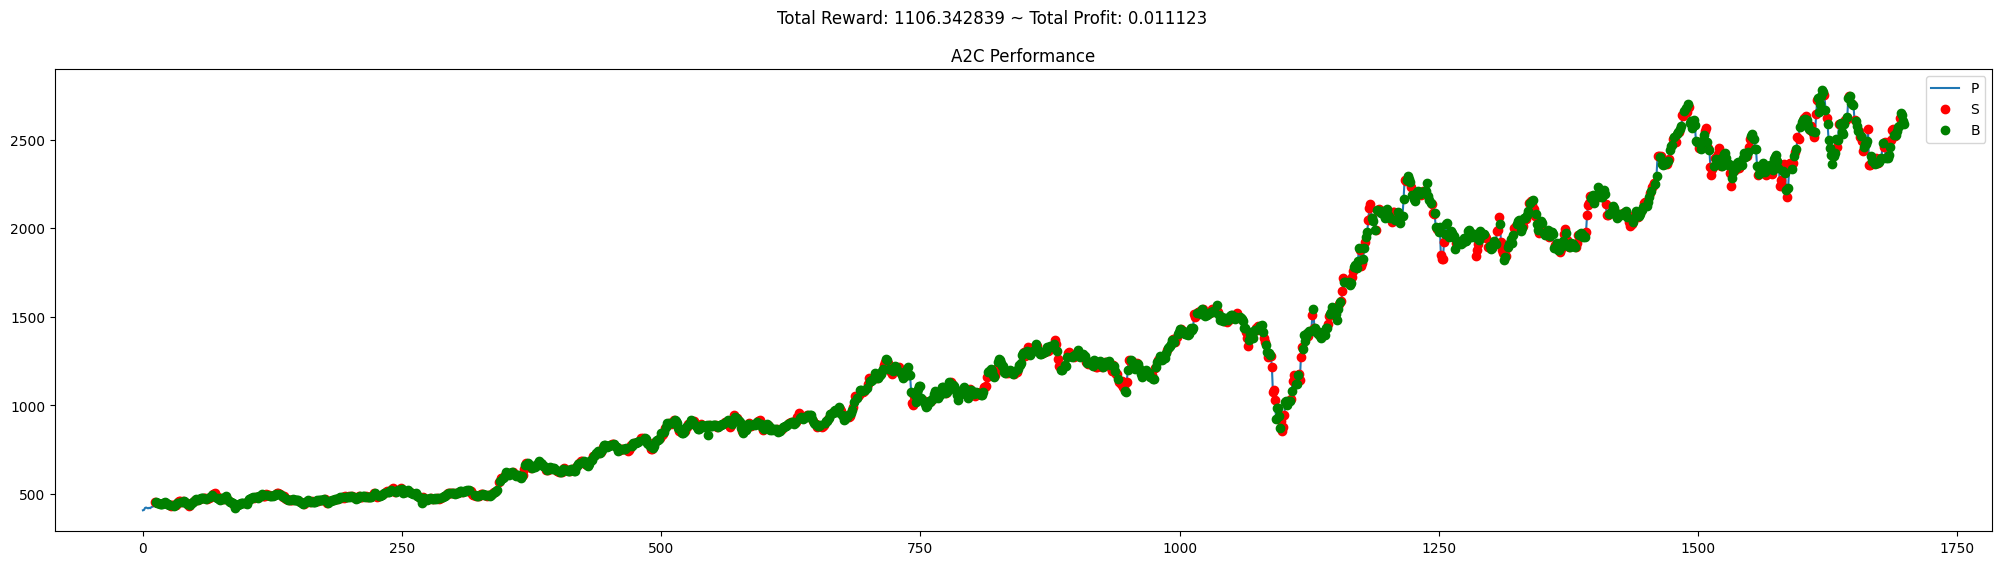

In [85]:
plt.figure(figsize=(25,6))
plt.cla()
env.render_all()
plt.legend('PSB')
plt.title('A2C Performance')
plt.show()


In [78]:
import tensorboard

In [ ]:
tensorboard.version.VERSION

In [86]:
env_maker = lambda: env2
env = DummyVecEnv([env_maker])

In [87]:
config = {
    "policy_type": "MlpPolicy",
    "total_timesteps": 1000000,
    "env_id": "Stocks-v0",
}
run = wandb.init(
    project="sb3-Latest",
    config=config,
    sync_tensorboard=True,  # auto-upload sb3's tensorboard metrics
    monitor_gym=True,  # auto-upload the videos of agents playing the game
    save_code=True,  # optional
)

model_with_signals_PPO = PPO(config["policy_type"], env, verbose=1, tensorboard_log=f"runs/{run.id}")
model_with_signals_PPO.learn(
    total_timesteps=config["total_timesteps"],
    callback=WandbCallback(
        model_save_path=f"models/{run.id}",
        verbose=2,
    ),
)
run.finish()

wandb: WARNING When using several event log directories, please call `wandb.tensorboard.patch(root_logdir="...")` before `wandb.init`


Using cpu device
Logging to runs/132qmzxu/PPO_1
-----------------------------
| time/              |      |
|    fps             | 6798 |
|    iterations      | 1    |
|    time_elapsed    | 0    |
|    total_timesteps | 2048 |
-----------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 4096         |
|    iterations           | 2            |
|    time_elapsed         | 0            |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0070480006 |
|    clip_fraction        | 0.025        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.69        |
|    explained_variance   | -0.049       |
|    learning_rate        | 0.0003       |
|    loss                 | 0.621        |
|    n_updates            | 10           |
|    policy_gradient_loss | -0.00502     |
|    value_loss           | 2.11         |
-----------

------------------------------------------
| time/                   |              |
|    fps                  | 3147         |
|    iterations           | 13           |
|    time_elapsed         | 8            |
|    total_timesteps      | 26624        |
| train/                  |              |
|    approx_kl            | 0.0071031884 |
|    clip_fraction        | 0.0231       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.664       |
|    explained_variance   | 0.000877     |
|    learning_rate        | 0.0003       |
|    loss                 | 185          |
|    n_updates            | 120          |
|    policy_gradient_loss | -0.00431     |
|    value_loss           | 349          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 3100        |
|    iterations           | 14          |
|    time_elapsed         | 9           |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 2909         |
|    iterations           | 24           |
|    time_elapsed         | 16           |
|    total_timesteps      | 49152        |
| train/                  |              |
|    approx_kl            | 0.0061150556 |
|    clip_fraction        | 0.085        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.571       |
|    explained_variance   | -0.0271      |
|    learning_rate        | 0.0003       |
|    loss                 | 2.51         |
|    n_updates            | 230          |
|    policy_gradient_loss | -0.00966     |
|    value_loss           | 6.3          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 2907        |
|    iterations           | 25          |
|    time_elapsed         | 17          |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 2919         |
|    iterations           | 35           |
|    time_elapsed         | 24           |
|    total_timesteps      | 71680        |
| train/                  |              |
|    approx_kl            | 0.0013960014 |
|    clip_fraction        | 0.0182       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.535       |
|    explained_variance   | 0.00354      |
|    learning_rate        | 0.0003       |
|    loss                 | 382          |
|    n_updates            | 340          |
|    policy_gradient_loss | -0.00249     |
|    value_loss           | 572          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 2927         |
|    iterations           | 36           |
|    time_elapsed         | 25           |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 2889         |
|    iterations           | 46           |
|    time_elapsed         | 32           |
|    total_timesteps      | 94208        |
| train/                  |              |
|    approx_kl            | 0.0050040726 |
|    clip_fraction        | 0.0583       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.43        |
|    explained_variance   | -0.0993      |
|    learning_rate        | 0.0003       |
|    loss                 | 1.22         |
|    n_updates            | 450          |
|    policy_gradient_loss | -0.00882     |
|    value_loss           | 6.57         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 2885         |
|    iterations           | 47           |
|    time_elapsed         | 33           |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 2913         |
|    iterations           | 57           |
|    time_elapsed         | 40           |
|    total_timesteps      | 116736       |
| train/                  |              |
|    approx_kl            | 0.0029904277 |
|    clip_fraction        | 0.0275       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.39        |
|    explained_variance   | 0.0118       |
|    learning_rate        | 0.0003       |
|    loss                 | 284          |
|    n_updates            | 560          |
|    policy_gradient_loss | -0.00432     |
|    value_loss           | 520          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 2907        |
|    iterations           | 58          |
|    time_elapsed         | 40          |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 2922        |
|    iterations           | 68          |
|    time_elapsed         | 47          |
|    total_timesteps      | 139264      |
| train/                  |             |
|    approx_kl            | 0.005890549 |
|    clip_fraction        | 0.0561      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.373      |
|    explained_variance   | -0.102      |
|    learning_rate        | 0.0003      |
|    loss                 | 2.92        |
|    n_updates            | 670         |
|    policy_gradient_loss | -0.00918    |
|    value_loss           | 5.72        |
-----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 2913       |
|    iterations           | 69         |
|    time_elapsed         | 48         |
|    total_timesteps      | 141312     

------------------------------------------
| time/                   |              |
|    fps                  | 2930         |
|    iterations           | 79           |
|    time_elapsed         | 55           |
|    total_timesteps      | 161792       |
| train/                  |              |
|    approx_kl            | 0.0027381894 |
|    clip_fraction        | 0.0224       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.371       |
|    explained_variance   | 0.0129       |
|    learning_rate        | 0.0003       |
|    loss                 | 174          |
|    n_updates            | 780          |
|    policy_gradient_loss | -0.00488     |
|    value_loss           | 257          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 2934        |
|    iterations           | 80          |
|    time_elapsed         | 55          |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 2958        |
|    iterations           | 90          |
|    time_elapsed         | 62          |
|    total_timesteps      | 184320      |
| train/                  |             |
|    approx_kl            | 0.005228375 |
|    clip_fraction        | 0.0658      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.345      |
|    explained_variance   | 0.0391      |
|    learning_rate        | 0.0003      |
|    loss                 | 13.3        |
|    n_updates            | 890         |
|    policy_gradient_loss | -0.00807    |
|    value_loss           | 18.6        |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 2959         |
|    iterations           | 91           |
|    time_elapsed         | 62           |
|    total_timesteps      | 1

------------------------------------------
| time/                   |              |
|    fps                  | 2969         |
|    iterations           | 101          |
|    time_elapsed         | 69           |
|    total_timesteps      | 206848       |
| train/                  |              |
|    approx_kl            | 0.0022894787 |
|    clip_fraction        | 0.0186       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.352       |
|    explained_variance   | 0.0284       |
|    learning_rate        | 0.0003       |
|    loss                 | 118          |
|    n_updates            | 1000         |
|    policy_gradient_loss | -0.0041      |
|    value_loss           | 227          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 2972         |
|    iterations           | 102          |
|    time_elapsed         | 70           |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 2994         |
|    iterations           | 112          |
|    time_elapsed         | 76           |
|    total_timesteps      | 229376       |
| train/                  |              |
|    approx_kl            | 0.0042298217 |
|    clip_fraction        | 0.0365       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.339       |
|    explained_variance   | 0.0158       |
|    learning_rate        | 0.0003       |
|    loss                 | 7.21         |
|    n_updates            | 1110         |
|    policy_gradient_loss | -0.00576     |
|    value_loss           | 68.7         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 2995         |
|    iterations           | 113          |
|    time_elapsed         | 77           |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 3011         |
|    iterations           | 123          |
|    time_elapsed         | 83           |
|    total_timesteps      | 251904       |
| train/                  |              |
|    approx_kl            | 0.0030139375 |
|    clip_fraction        | 0.0294       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.348       |
|    explained_variance   | 0.0365       |
|    learning_rate        | 0.0003       |
|    loss                 | 103          |
|    n_updates            | 1220         |
|    policy_gradient_loss | -0.007       |
|    value_loss           | 156          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 3014        |
|    iterations           | 124         |
|    time_elapsed         | 84          |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 3030         |
|    iterations           | 134          |
|    time_elapsed         | 90           |
|    total_timesteps      | 274432       |
| train/                  |              |
|    approx_kl            | 0.0042378884 |
|    clip_fraction        | 0.0375       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.316       |
|    explained_variance   | 0.0584       |
|    learning_rate        | 0.0003       |
|    loss                 | 41.4         |
|    n_updates            | 1330         |
|    policy_gradient_loss | -0.00632     |
|    value_loss           | 104          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 3029         |
|    iterations           | 135          |
|    time_elapsed         | 91           |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 3044         |
|    iterations           | 145          |
|    time_elapsed         | 97           |
|    total_timesteps      | 296960       |
| train/                  |              |
|    approx_kl            | 0.0029695448 |
|    clip_fraction        | 0.0252       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.324       |
|    explained_variance   | 0.0662       |
|    learning_rate        | 0.0003       |
|    loss                 | 71.9         |
|    n_updates            | 1440         |
|    policy_gradient_loss | -0.00467     |
|    value_loss           | 132          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 3045        |
|    iterations           | 146         |
|    time_elapsed         | 98          |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 3058        |
|    iterations           | 156         |
|    time_elapsed         | 104         |
|    total_timesteps      | 319488      |
| train/                  |             |
|    approx_kl            | 0.003607289 |
|    clip_fraction        | 0.0297      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.279      |
|    explained_variance   | 0.0637      |
|    learning_rate        | 0.0003      |
|    loss                 | 87.4        |
|    n_updates            | 1550        |
|    policy_gradient_loss | -0.00524    |
|    value_loss           | 181         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 3059         |
|    iterations           | 157          |
|    time_elapsed         | 105          |
|    total_timesteps      | 3

------------------------------------------
| time/                   |              |
|    fps                  | 3070         |
|    iterations           | 167          |
|    time_elapsed         | 111          |
|    total_timesteps      | 342016       |
| train/                  |              |
|    approx_kl            | 0.0026153466 |
|    clip_fraction        | 0.0244       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.308       |
|    explained_variance   | 0.0751       |
|    learning_rate        | 0.0003       |
|    loss                 | 49.5         |
|    n_updates            | 1660         |
|    policy_gradient_loss | -0.00622     |
|    value_loss           | 119          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 3071        |
|    iterations           | 168         |
|    time_elapsed         | 112         |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 3079        |
|    iterations           | 178         |
|    time_elapsed         | 118         |
|    total_timesteps      | 364544      |
| train/                  |             |
|    approx_kl            | 0.002375029 |
|    clip_fraction        | 0.0208      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.29       |
|    explained_variance   | 0.0652      |
|    learning_rate        | 0.0003      |
|    loss                 | 111         |
|    n_updates            | 1770        |
|    policy_gradient_loss | -0.00366    |
|    value_loss           | 186         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 3078         |
|    iterations           | 179          |
|    time_elapsed         | 119          |
|    total_timesteps      | 3

-----------------------------------------
| time/                   |             |
|    fps                  | 3086        |
|    iterations           | 189         |
|    time_elapsed         | 125         |
|    total_timesteps      | 387072      |
| train/                  |             |
|    approx_kl            | 0.005630729 |
|    clip_fraction        | 0.0379      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.287      |
|    explained_variance   | 0.0985      |
|    learning_rate        | 0.0003      |
|    loss                 | 46.6        |
|    n_updates            | 1880        |
|    policy_gradient_loss | -0.00548    |
|    value_loss           | 112         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 3088         |
|    iterations           | 190          |
|    time_elapsed         | 126          |
|    total_timesteps      | 3

------------------------------------------
| time/                   |              |
|    fps                  | 3095         |
|    iterations           | 200          |
|    time_elapsed         | 132          |
|    total_timesteps      | 409600       |
| train/                  |              |
|    approx_kl            | 0.0020609486 |
|    clip_fraction        | 0.0245       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.262       |
|    explained_variance   | 0.072        |
|    learning_rate        | 0.0003       |
|    loss                 | 131          |
|    n_updates            | 1990         |
|    policy_gradient_loss | -0.00473     |
|    value_loss           | 266          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 3096         |
|    iterations           | 201          |
|    time_elapsed         | 132          |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 3102         |
|    iterations           | 211          |
|    time_elapsed         | 139          |
|    total_timesteps      | 432128       |
| train/                  |              |
|    approx_kl            | 0.0027557542 |
|    clip_fraction        | 0.0271       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.244       |
|    explained_variance   | 0.145        |
|    learning_rate        | 0.0003       |
|    loss                 | 34.8         |
|    n_updates            | 2100         |
|    policy_gradient_loss | -0.00526     |
|    value_loss           | 102          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 3103         |
|    iterations           | 212          |
|    time_elapsed         | 139          |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 3108         |
|    iterations           | 222          |
|    time_elapsed         | 146          |
|    total_timesteps      | 454656       |
| train/                  |              |
|    approx_kl            | 0.0023833872 |
|    clip_fraction        | 0.0261       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.268       |
|    explained_variance   | 0.0948       |
|    learning_rate        | 0.0003       |
|    loss                 | 115          |
|    n_updates            | 2210         |
|    policy_gradient_loss | -0.00503     |
|    value_loss           | 176          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 3109         |
|    iterations           | 223          |
|    time_elapsed         | 146          |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 3113         |
|    iterations           | 233          |
|    time_elapsed         | 153          |
|    total_timesteps      | 477184       |
| train/                  |              |
|    approx_kl            | 0.0032374738 |
|    clip_fraction        | 0.0323       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.253       |
|    explained_variance   | 0.199        |
|    learning_rate        | 0.0003       |
|    loss                 | 38           |
|    n_updates            | 2320         |
|    policy_gradient_loss | -0.00628     |
|    value_loss           | 55.4         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 3113         |
|    iterations           | 234          |
|    time_elapsed         | 153          |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 3119         |
|    iterations           | 244          |
|    time_elapsed         | 160          |
|    total_timesteps      | 499712       |
| train/                  |              |
|    approx_kl            | 0.0038335677 |
|    clip_fraction        | 0.0357       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.269       |
|    explained_variance   | 0.118        |
|    learning_rate        | 0.0003       |
|    loss                 | 68.3         |
|    n_updates            | 2430         |
|    policy_gradient_loss | -0.00811     |
|    value_loss           | 187          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 3119        |
|    iterations           | 245         |
|    time_elapsed         | 160         |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 3124         |
|    iterations           | 255          |
|    time_elapsed         | 167          |
|    total_timesteps      | 522240       |
| train/                  |              |
|    approx_kl            | 0.0031896317 |
|    clip_fraction        | 0.0334       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.25        |
|    explained_variance   | 0.204        |
|    learning_rate        | 0.0003       |
|    loss                 | 14.1         |
|    n_updates            | 2540         |
|    policy_gradient_loss | -0.00622     |
|    value_loss           | 49.2         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 3124         |
|    iterations           | 256          |
|    time_elapsed         | 167          |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 3129         |
|    iterations           | 266          |
|    time_elapsed         | 174          |
|    total_timesteps      | 544768       |
| train/                  |              |
|    approx_kl            | 0.0033638058 |
|    clip_fraction        | 0.028        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.276       |
|    explained_variance   | 0.122        |
|    learning_rate        | 0.0003       |
|    loss                 | 63.8         |
|    n_updates            | 2650         |
|    policy_gradient_loss | -0.00522     |
|    value_loss           | 183          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 3130         |
|    iterations           | 267          |
|    time_elapsed         | 174          |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 3134        |
|    iterations           | 277         |
|    time_elapsed         | 180         |
|    total_timesteps      | 567296      |
| train/                  |             |
|    approx_kl            | 0.008695796 |
|    clip_fraction        | 0.0751      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.24       |
|    explained_variance   | 0.201       |
|    learning_rate        | 0.0003      |
|    loss                 | 13.1        |
|    n_updates            | 2760        |
|    policy_gradient_loss | -0.00944    |
|    value_loss           | 33.2        |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 3135         |
|    iterations           | 278          |
|    time_elapsed         | 181          |
|    total_timesteps      | 5

------------------------------------------
| time/                   |              |
|    fps                  | 3138         |
|    iterations           | 288          |
|    time_elapsed         | 187          |
|    total_timesteps      | 589824       |
| train/                  |              |
|    approx_kl            | 0.0021035448 |
|    clip_fraction        | 0.0262       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.264       |
|    explained_variance   | 0.128        |
|    learning_rate        | 0.0003       |
|    loss                 | 210          |
|    n_updates            | 2870         |
|    policy_gradient_loss | -0.00328     |
|    value_loss           | 271          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 3139         |
|    iterations           | 289          |
|    time_elapsed         | 188          |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 3143         |
|    iterations           | 299          |
|    time_elapsed         | 194          |
|    total_timesteps      | 612352       |
| train/                  |              |
|    approx_kl            | 0.0092906365 |
|    clip_fraction        | 0.0681       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.223       |
|    explained_variance   | 0.145        |
|    learning_rate        | 0.0003       |
|    loss                 | 20           |
|    n_updates            | 2980         |
|    policy_gradient_loss | -0.0108      |
|    value_loss           | 27.4         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 3143         |
|    iterations           | 300          |
|    time_elapsed         | 195          |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 3147         |
|    iterations           | 310          |
|    time_elapsed         | 201          |
|    total_timesteps      | 634880       |
| train/                  |              |
|    approx_kl            | 0.0024312371 |
|    clip_fraction        | 0.0229       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.263       |
|    explained_variance   | 0.147        |
|    learning_rate        | 0.0003       |
|    loss                 | 119          |
|    n_updates            | 3090         |
|    policy_gradient_loss | -0.00541     |
|    value_loss           | 258          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 3147         |
|    iterations           | 311          |
|    time_elapsed         | 202          |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 3150        |
|    iterations           | 321         |
|    time_elapsed         | 208         |
|    total_timesteps      | 657408      |
| train/                  |             |
|    approx_kl            | 0.008238811 |
|    clip_fraction        | 0.0738      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.223      |
|    explained_variance   | -0.474      |
|    learning_rate        | 0.0003      |
|    loss                 | 2.62        |
|    n_updates            | 3200        |
|    policy_gradient_loss | -0.0102     |
|    value_loss           | 8.4         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 3151         |
|    iterations           | 322          |
|    time_elapsed         | 209          |
|    total_timesteps      | 6

-----------------------------------------
| time/                   |             |
|    fps                  | 3154        |
|    iterations           | 332         |
|    time_elapsed         | 215         |
|    total_timesteps      | 679936      |
| train/                  |             |
|    approx_kl            | 0.005111118 |
|    clip_fraction        | 0.0378      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.276      |
|    explained_variance   | 0.128       |
|    learning_rate        | 0.0003      |
|    loss                 | 122         |
|    n_updates            | 3310        |
|    policy_gradient_loss | -0.0077     |
|    value_loss           | 296         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 3154         |
|    iterations           | 333          |
|    time_elapsed         | 216          |
|    total_timesteps      | 6

-----------------------------------------
| time/                   |             |
|    fps                  | 3156        |
|    iterations           | 343         |
|    time_elapsed         | 222         |
|    total_timesteps      | 702464      |
| train/                  |             |
|    approx_kl            | 0.008620465 |
|    clip_fraction        | 0.0736      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.225      |
|    explained_variance   | -0.461      |
|    learning_rate        | 0.0003      |
|    loss                 | 4.43        |
|    n_updates            | 3420        |
|    policy_gradient_loss | -0.013      |
|    value_loss           | 10.2        |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 3157         |
|    iterations           | 344          |
|    time_elapsed         | 223          |
|    total_timesteps      | 7

------------------------------------------
| time/                   |              |
|    fps                  | 3159         |
|    iterations           | 354          |
|    time_elapsed         | 229          |
|    total_timesteps      | 724992       |
| train/                  |              |
|    approx_kl            | 0.0034903768 |
|    clip_fraction        | 0.038        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.263       |
|    explained_variance   | 0.184        |
|    learning_rate        | 0.0003       |
|    loss                 | 99.8         |
|    n_updates            | 3530         |
|    policy_gradient_loss | -0.00655     |
|    value_loss           | 268          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 3159        |
|    iterations           | 355         |
|    time_elapsed         | 230         |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 3161        |
|    iterations           | 365         |
|    time_elapsed         | 236         |
|    total_timesteps      | 747520      |
| train/                  |             |
|    approx_kl            | 0.009180127 |
|    clip_fraction        | 0.0767      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.229      |
|    explained_variance   | -0.543      |
|    learning_rate        | 0.0003      |
|    loss                 | 4.19        |
|    n_updates            | 3640        |
|    policy_gradient_loss | -0.0124     |
|    value_loss           | 12.2        |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 3161         |
|    iterations           | 366          |
|    time_elapsed         | 237          |
|    total_timesteps      | 7

-----------------------------------------
| time/                   |             |
|    fps                  | 3163        |
|    iterations           | 376         |
|    time_elapsed         | 243         |
|    total_timesteps      | 770048      |
| train/                  |             |
|    approx_kl            | 0.002784736 |
|    clip_fraction        | 0.0274      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.242      |
|    explained_variance   | 0.22        |
|    learning_rate        | 0.0003      |
|    loss                 | 149         |
|    n_updates            | 3750        |
|    policy_gradient_loss | -0.00665    |
|    value_loss           | 282         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 3164        |
|    iterations           | 377         |
|    time_elapsed         | 244         |
|    total_timesteps      | 772096

-----------------------------------------
| time/                   |             |
|    fps                  | 3164        |
|    iterations           | 387         |
|    time_elapsed         | 250         |
|    total_timesteps      | 792576      |
| train/                  |             |
|    approx_kl            | 0.009008797 |
|    clip_fraction        | 0.0674      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.236      |
|    explained_variance   | 0.142       |
|    learning_rate        | 0.0003      |
|    loss                 | 12.3        |
|    n_updates            | 3860        |
|    policy_gradient_loss | -0.00722    |
|    value_loss           | 46.5        |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 3165         |
|    iterations           | 388          |
|    time_elapsed         | 251          |
|    total_timesteps      | 7

------------------------------------------
| time/                   |              |
|    fps                  | 3167         |
|    iterations           | 398          |
|    time_elapsed         | 257          |
|    total_timesteps      | 815104       |
| train/                  |              |
|    approx_kl            | 0.0052367235 |
|    clip_fraction        | 0.0456       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.24        |
|    explained_variance   | 0.235        |
|    learning_rate        | 0.0003       |
|    loss                 | 66.9         |
|    n_updates            | 3970         |
|    policy_gradient_loss | -0.00786     |
|    value_loss           | 200          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 3167        |
|    iterations           | 399         |
|    time_elapsed         | 257         |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 3169         |
|    iterations           | 409          |
|    time_elapsed         | 264          |
|    total_timesteps      | 837632       |
| train/                  |              |
|    approx_kl            | 0.0071249288 |
|    clip_fraction        | 0.0638       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.224       |
|    explained_variance   | 0.222        |
|    learning_rate        | 0.0003       |
|    loss                 | 12.4         |
|    n_updates            | 4080         |
|    policy_gradient_loss | -0.00839     |
|    value_loss           | 55.9         |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 3169        |
|    iterations           | 410         |
|    time_elapsed         | 264         |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 3171         |
|    iterations           | 420          |
|    time_elapsed         | 271          |
|    total_timesteps      | 860160       |
| train/                  |              |
|    approx_kl            | 0.0028682617 |
|    clip_fraction        | 0.0376       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.237       |
|    explained_variance   | 0.252        |
|    learning_rate        | 0.0003       |
|    loss                 | 83.5         |
|    n_updates            | 4190         |
|    policy_gradient_loss | -0.00677     |
|    value_loss           | 203          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 3170        |
|    iterations           | 421         |
|    time_elapsed         | 271         |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 3172         |
|    iterations           | 431          |
|    time_elapsed         | 278          |
|    total_timesteps      | 882688       |
| train/                  |              |
|    approx_kl            | 0.0063808933 |
|    clip_fraction        | 0.0533       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.201       |
|    explained_variance   | 0.137        |
|    learning_rate        | 0.0003       |
|    loss                 | 17.7         |
|    n_updates            | 4300         |
|    policy_gradient_loss | -0.0104      |
|    value_loss           | 31.9         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 3172         |
|    iterations           | 432          |
|    time_elapsed         | 278          |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 3174         |
|    iterations           | 442          |
|    time_elapsed         | 285          |
|    total_timesteps      | 905216       |
| train/                  |              |
|    approx_kl            | 0.0048702727 |
|    clip_fraction        | 0.045        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.216       |
|    explained_variance   | 0.3          |
|    learning_rate        | 0.0003       |
|    loss                 | 77.9         |
|    n_updates            | 4410         |
|    policy_gradient_loss | -0.00976     |
|    value_loss           | 154          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 3175        |
|    iterations           | 443         |
|    time_elapsed         | 285         |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 3177         |
|    iterations           | 453          |
|    time_elapsed         | 291          |
|    total_timesteps      | 927744       |
| train/                  |              |
|    approx_kl            | 0.0039141597 |
|    clip_fraction        | 0.0347       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.213       |
|    explained_variance   | 0.198        |
|    learning_rate        | 0.0003       |
|    loss                 | 52.8         |
|    n_updates            | 4520         |
|    policy_gradient_loss | -0.00748     |
|    value_loss           | 136          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 3177         |
|    iterations           | 454          |
|    time_elapsed         | 292          |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 3177        |
|    iterations           | 464         |
|    time_elapsed         | 299         |
|    total_timesteps      | 950272      |
| train/                  |             |
|    approx_kl            | 0.005784257 |
|    clip_fraction        | 0.0458      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.227      |
|    explained_variance   | 0.289       |
|    learning_rate        | 0.0003      |
|    loss                 | 76.8        |
|    n_updates            | 4630        |
|    policy_gradient_loss | -0.0073     |
|    value_loss           | 110         |
-----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 3177       |
|    iterations           | 465        |
|    time_elapsed         | 299        |
|    total_timesteps      | 952320     

------------------------------------------
| time/                   |              |
|    fps                  | 3180         |
|    iterations           | 475          |
|    time_elapsed         | 305          |
|    total_timesteps      | 972800       |
| train/                  |              |
|    approx_kl            | 0.0045585185 |
|    clip_fraction        | 0.0449       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.222       |
|    explained_variance   | 0.273        |
|    learning_rate        | 0.0003       |
|    loss                 | 110          |
|    n_updates            | 4740         |
|    policy_gradient_loss | -0.00843     |
|    value_loss           | 151          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 3180         |
|    iterations           | 476          |
|    time_elapsed         | 306          |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 3181         |
|    iterations           | 486          |
|    time_elapsed         | 312          |
|    total_timesteps      | 995328       |
| train/                  |              |
|    approx_kl            | 0.0065288916 |
|    clip_fraction        | 0.0595       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.225       |
|    explained_variance   | 0.339        |
|    learning_rate        | 0.0003       |
|    loss                 | 49.3         |
|    n_updates            | 4850         |
|    policy_gradient_loss | -0.0103      |
|    value_loss           | 103          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 3181         |
|    iterations           | 487          |
|    time_elapsed         | 313          |
|    total_

global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
time/fps,█▃▁▁▁▁▁▂▂▂▂▃▃▃▃▃▃▃▃▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄
train/approx_kl,▁▃▄▅▂▁▂▂▁▂▄▃▅▅▂▃▁▂▁▂█▅▆▂▂▃▃▂▂▁▆▄▃▃▃▂▂▁▂▇
train/clip_fraction,▁▆▄▇▃▃▃▂▂▄▅▅▆▅▄▄▄▃▂▃█▇▇▄▄▅▄▃▄▃▆▅▅▅▅▄▄▃▄▇
train/clip_range,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train/entropy_loss,▁▂▃▄▅▆▆▆▆▅▆▇▇▇▇▇▇▇▇▇██▇▇▇▇▇▇▇▇████████▇█
train/explained_variance,▆▆▆▅▆▆▆▆▆▆▆▅▅▇▇▇▇▇▇▇▅▃▇▇▇▇▇▇▇▇▁██████▇█▄
train/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train/loss,▄▁▁▁▂▃▃▅▆▇▂▁▁▂▃▃▅▇█▅▁▁▂▃▃▃▄▅▅▆▁▂▂▄▄▇▇▅█▁
train/policy_gradient_loss,█▅▄▁▅▆▆▅▆▅▅▄▂▃▅▆▅▅▆▆▂▃▃▅▅▃▄▆▅▅▂▃▄▄▄▄▅▆▅▂
train/value_loss,▆▂▂▁▂▂▂▃▅█▂▁▁▂▂▃▃▅▆▅▁▁▂▂▃▃▅▅▆▅▁▂▂▃▃▆▆▆▅▁


In [88]:
env = MyCustomEnv(df=df, window_size=12, frame_bound=(5012,6700))
obs = env.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model_with_signals_PPO.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break
        


info {'total_reward': 1119.6397472049357, 'total_profit': 0.006536767495294053, 'position': 1}


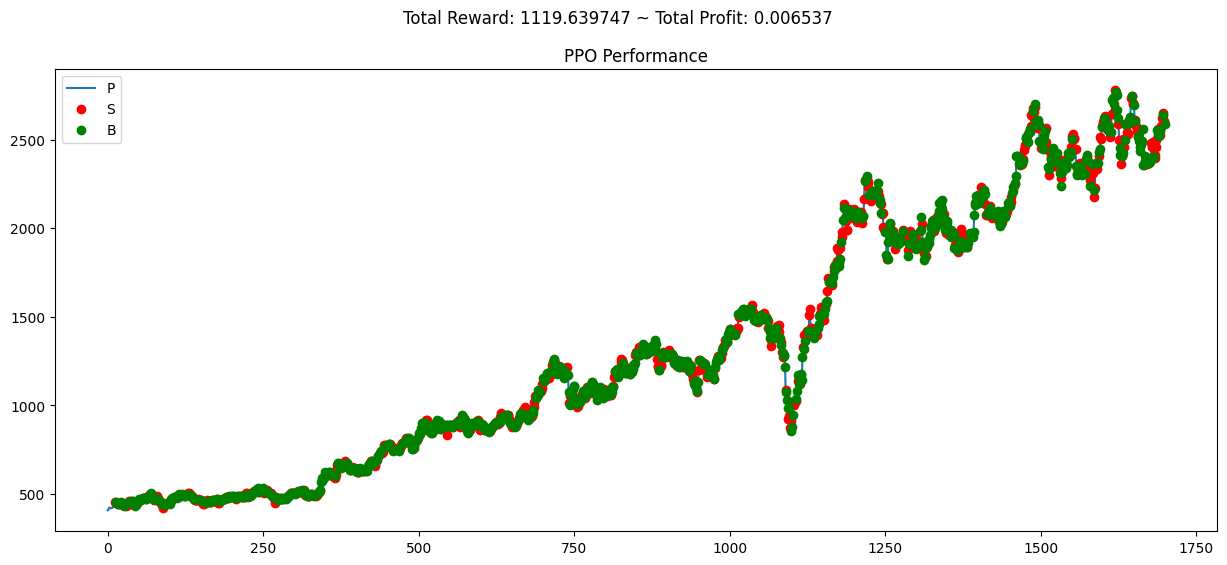

In [89]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.legend('PSB')
plt.title('PPO Performance')
plt.show()

In [90]:
env_maker = lambda: env2
env = DummyVecEnv([env_maker])

In [91]:
from stable_baselines3 import DQN

In [ ]:
config = {
    "policy_type": "MlpPolicy",
    "total_timesteps": 1000000,
    "env_id": "Stocks-v0",
}
run = wandb.init(
    project="sb3-Latest",
    config=config,
    sync_tensorboard=True,  # auto-upload sb3's tensorboard metrics
    monitor_gym=True,  # auto-upload the videos of agents playing the game
    save_code=True,  # optional
)

model_with_signals_DQN = DQN(config["policy_type"], env, verbose=1, tensorboard_log=f"runs/{run.id}")
model_with_signals_DQN.learn(
    total_timesteps=config["total_timesteps"],
    callback=WandbCallback(
        model_save_path=f"models/{run.id}",
        verbose=2,
    ),
)
run.finish()

wandb: WARNING When using several event log directories, please call `wandb.tensorboard.patch(root_logdir="...")` before `wandb.init`


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to runs/2s6uvqid/DQN_1
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.6e+03  |
|    ep_rew_mean      | 1.24e+03 |
|    exploration_rate | 0.939    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 34949    |
|    time_elapsed     | 0        |
|    total_timesteps  | 6388     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.6e+03  |
|    ep_rew_mean      | 1.09e+03 |
|    exploration_rate | 0.879    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 35418    |
|    time_elapsed     | 0        |
|    total_timesteps  | 12776    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.6e+03  |


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.6e+03  |
|    ep_rew_mean      | 1.11e+03 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 76       |
|    fps              | 6337     |
|    time_elapsed     | 19       |
|    total_timesteps  | 121372   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.58e+04 |
|    n_updates        | 17842    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.6e+03  |
|    ep_rew_mean      | 1.12e+03 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 80       |
|    fps              | 6167     |
|    time_elapsed     | 20       |
|    total_timesteps  | 127760   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.25e+04 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.6e+03  |
|    ep_rew_mean      | 1.22e+03 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 140      |
|    fps              | 4955     |
|    time_elapsed     | 45       |
|    total_timesteps  | 223580   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.04e+04 |
|    n_updates        | 43394    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.6e+03  |
|    ep_rew_mean      | 1.26e+03 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 144      |
|    fps              | 4910     |
|    time_elapsed     | 46       |
|    total_timesteps  | 229968   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.22e+03 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.6e+03  |
|    ep_rew_mean      | 1.09e+03 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 204      |
|    fps              | 4583     |
|    time_elapsed     | 71       |
|    total_timesteps  | 325788   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.36e+04 |
|    n_updates        | 68946    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.6e+03  |
|    ep_rew_mean      | 1.09e+03 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 208      |
|    fps              | 4567     |
|    time_elapsed     | 72       |
|    total_timesteps  | 332176   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.49e+04 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.6e+03  |
|    ep_rew_mean      | 1.06e+03 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 268      |
|    fps              | 4321     |
|    time_elapsed     | 99       |
|    total_timesteps  | 427996   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.83e+03 |
|    n_updates        | 94498    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.6e+03  |
|    ep_rew_mean      | 1.04e+03 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 272      |
|    fps              | 4309     |
|    time_elapsed     | 100      |
|    total_timesteps  | 434384   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.17e+03 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.6e+03  |
|    ep_rew_mean      | 1.17e+03 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 332      |
|    fps              | 4221     |
|    time_elapsed     | 125      |
|    total_timesteps  | 530204   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7e+03    |
|    n_updates        | 120050   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.6e+03  |
|    ep_rew_mean      | 1.18e+03 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 336      |
|    fps              | 4219     |
|    time_elapsed     | 127      |
|    total_timesteps  | 536592   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.87e+03 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.6e+03  |
|    ep_rew_mean      | 1.18e+03 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 396      |
|    fps              | 4206     |
|    time_elapsed     | 150      |
|    total_timesteps  | 632412   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.5e+03  |
|    n_updates        | 145602   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.6e+03  |
|    ep_rew_mean      | 1.18e+03 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 400      |
|    fps              | 4195     |
|    time_elapsed     | 152      |
|    total_timesteps  | 638800   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.47e+03 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.6e+03  |
|    ep_rew_mean      | 1.05e+03 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 460      |
|    fps              | 4177     |
|    time_elapsed     | 175      |
|    total_timesteps  | 734620   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.81e+03 |
|    n_updates        | 171154   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.6e+03  |
|    ep_rew_mean      | 1.06e+03 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 464      |
|    fps              | 4177     |
|    time_elapsed     | 177      |
|    total_timesteps  | 741008   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.18e+03 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.6e+03  |
|    ep_rew_mean      | 1e+03    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 524      |
|    fps              | 4173     |
|    time_elapsed     | 200      |
|    total_timesteps  | 836828   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.95e+03 |
|    n_updates        | 196706   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.6e+03  |
|    ep_rew_mean      | 1.01e+03 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 528      |
|    fps              | 4173     |
|    time_elapsed     | 202      |
|    total_timesteps  | 843216   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.39e+03 |
|    n_updates      

In [ ]:
env = MyCustomEnv(df=df, window_size=12, frame_bound=(5102,6700))
obs = env.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model_with_signals_DQN.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break

In [ ]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.legend('PSB')
plt.title('DQN Performance')
plt.show()